In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar
from collections import Counter
import operator

In [2]:
df = pd.read_csv("point_to_point_df")

In [3]:
df

,Unnamed: 0,id,user_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,0,132512,22177,NaN,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0
1,1,132513,21413,NaN,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0
2,2,132514,22178,NaN,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0
3,3,132515,13034,NaN,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0
4,4,132517,22180,NaN,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0
5,5,132518,17712,NaN,1021.0,1323.0,NaN,NaN,1/1/2013 22:30,NaN,1/1/2013 8:01,13.028530,77.546250,12.869805,77.653211,0
6,7,132520,22181,NaN,1192.0,832.0,NaN,NaN,1/1/2013 11:00,NaN,1/1/2013 9:39,12.976770,77.572700,12.880190,77.645580,0
7,9,132522,22184,NaN,516.0,376.0,NaN,NaN,1/1/2013 11:00,NaN,1/1/2013 9:49,13.005600,77.657990,12.902450,77.660810,0
8,10,132523,4941,NaN,150.0,776.0,NaN,NaN,1/1/2013 11:00,NaN,1/1/2013 9:55,12.897240,77.610650,13.015080,77.677960,0
9,11,132524,17037,NaN,455.0,1330.0,NaN,NaN,1/1/2013 12:45,NaN,1/1/2013 9:59,12.999874,77.678120,12.953434,77.706510,0


In [4]:
len(df)

34292

In [5]:
def findDay(date): 
    date = date.split(" ")[0]
    born = datetime.datetime.strptime(date, '%m/%d/%Y').weekday() 
    return (calendar.day_name[born]) 

In [6]:
def findTime(date):
    return date.split(" ")[1]

In [7]:
def takeOutMonth(data):
    try:
        data = data.split(" ")[0].split("/")
        month = data[0]
        return month
    except:
        return data

In [8]:
def numberToMonth(data):
    MonthDict={ '1' : "January",
       '2': "February",
       '3' : "March",
       '4' : "April",
       '5' : "May",
       '6' : "June",
       '7' : "July",
       '8' : "August",
       '9' : "September",
       '10' : "October",
       '11' : "November",
       '12' : "December"
}
    return MonthDict[data]

In [9]:
def time_to_range(time):
    try:
        time = int(time.split(":")[0])
        if 0 <= time < 2:
            return '0-2'
        if 2 <= time < 4:
            return '2-4'
        if 4 <= time < 6:
            return '4-6'
        if 6 <= time < 8:
            return '6-8'
        if 8 <= time < 10:
            return '8-10'
        if 10 <= time < 12:
            return '10-12'
        if 12 <= time < 14:
            return '12-14'
        if 14 <= time < 16:
            return '14-16'
        if 16 <= time < 18:
            return '16-18'
        if 18 <= time < 20:
            return '18-20'
        if 20 <= time < 22:
            return '20-22'
        if 22 <= time <= 24:
            return '22-24'
    except:
        return time

In [10]:
def applyFunc(toColumn, addedColumnName, func):
    df[addedColumnName] = df[toColumn].apply(lambda x: func(x))

In [11]:
applyFunc('from_date', 'day', findDay)

In [12]:
applyFunc('from_date', 'time', findTime)

In [13]:
applyFunc('from_date', 'month', takeOutMonth)

In [14]:
applyFunc('month', 'month', numberToMonth)

In [15]:
applyFunc('time', 'time-interval', time_to_range)

Text(0, 0.5, 'no. of bookings')

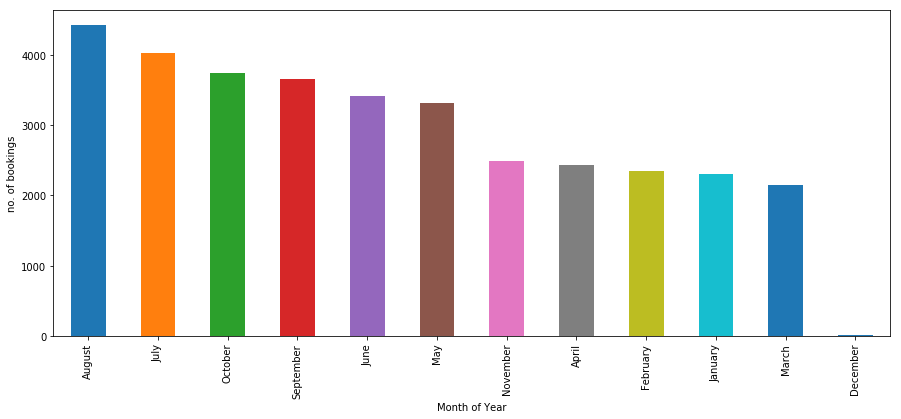

In [16]:
plot = df['month'].value_counts().plot.bar(figsize=(15,6))
plot.set_xlabel("Month of Year")
plot.set_ylabel("no. of bookings")

Text(0, 0.5, 'no. of bookings')

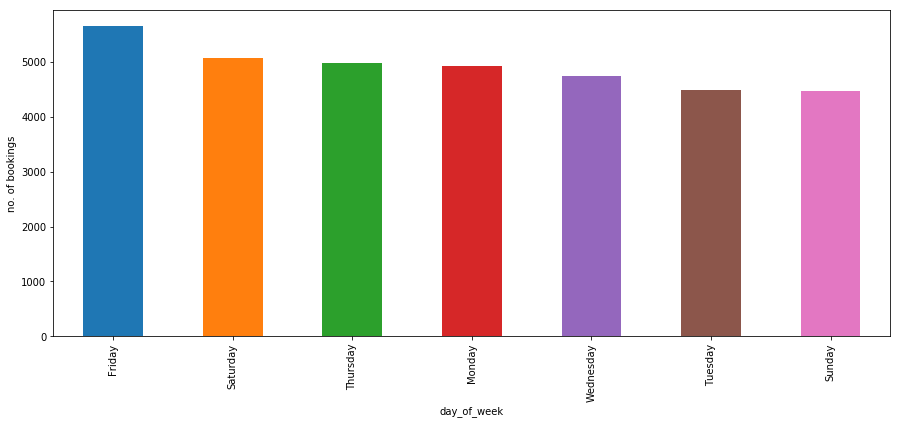

In [17]:
plot = df['day'].value_counts().plot.bar(figsize=(15,6))
plot.set_xlabel("day_of_week")
plot.set_ylabel("no. of bookings")

In [18]:
df_Mon = df[df['day'] == 'Monday']
df_Tue = df[df['day'] == 'Tuesday']
df_wed = df[df['day'] == 'Wednesday']
df_thurs = df[df['day'] == 'Thursday']
df_fri = df[df['day'] == 'Friday']
df_sat = df[df['day'] == 'Saturday']
df_sun = df[df['day'] == 'Sunday']

# Monday Analysis

Text(0, 0.5, 'no. of bookings')

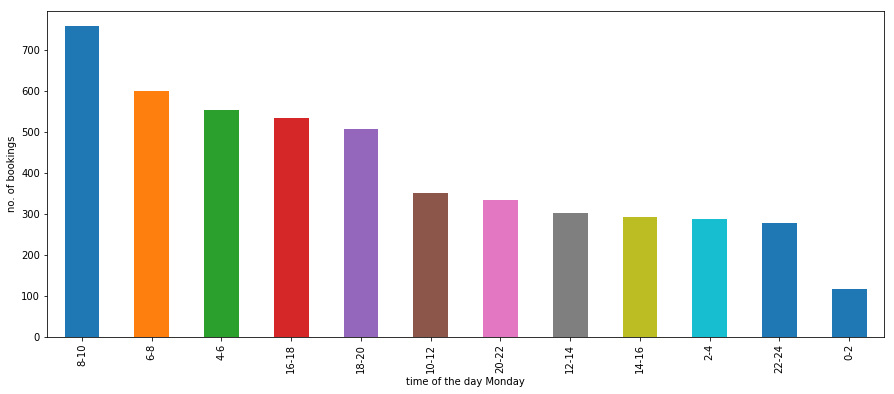

In [19]:
plot = df_Mon['time-interval'].value_counts().plot.bar(figsize=(15,6))
plot.set_xlabel("time of the day Monday")
plot.set_ylabel("no. of bookings")

[Text(0, 0.5, 'number of bookings'), Text(0.5, 0, 'from_Area Code')]

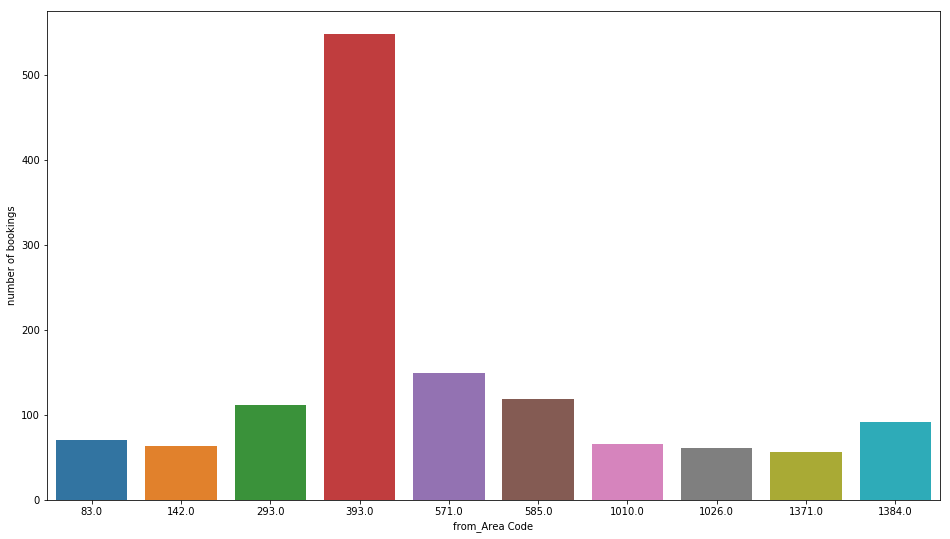

In [20]:
from_area_id_frequency = Counter(df_Mon['from_area_id'])
from_area_id_sorted = sorted(from_area_id_frequency.items(), key=operator.itemgetter(1))

top_bookings = from_area_id_sorted[-10:]

area_code = []
area_freq = []

for i, j in top_bookings:
    area_code.append(i)
    area_freq.append(j)

from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize=(16,9))
ax = sns.barplot(area_code, area_freq, ax=ax)
ax.set(xlabel="from_Area Code", ylabel="number of bookings")

# area 393 analysis

In [21]:
area_393_df = df_Mon[df_Mon['from_area_id'] == 393]

# where do people go from area 393

[Text(0, 0.5, 'number of bookings'), Text(0.5, 0, 'exact location')]

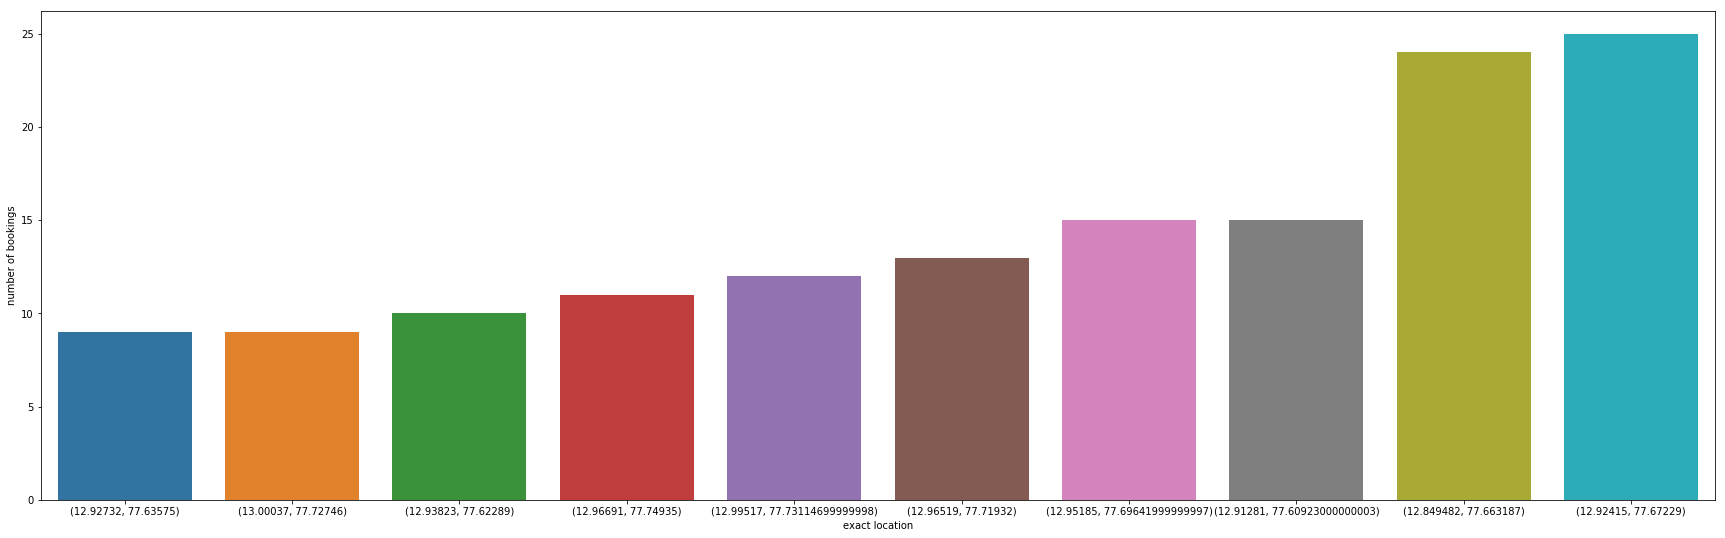

In [22]:
to_loc = list(zip(area_393_df['to_lat'], area_393_df['to_long']))
to_loc = Counter(to_loc)
to_loc = sorted(to_loc.items(), key=operator.itemgetter(1))

to_loc_top_10 = to_loc[-10:]

to_loc_top_10_exactLocation = []
to_loc_top_10_freq = []
for i, j in to_loc_top_10:
    to_loc_top_10_exactLocation.append(i)
    to_loc_top_10_freq.append(j)

to_loc_top_10_exactLocation = [str(i) for i in to_loc_top_10_exactLocation]

fig, ax = pyplot.subplots(figsize=(30,9))
ax = sns.barplot(to_loc_top_10_exactLocation, to_loc_top_10_freq, ax=ax)
ax.set(xlabel="exact location", ylabel="number of bookings")

# Cancellation

[Text(0, 0.5, 'number of cancellations'), Text(0.5, 0, 'area Id')]

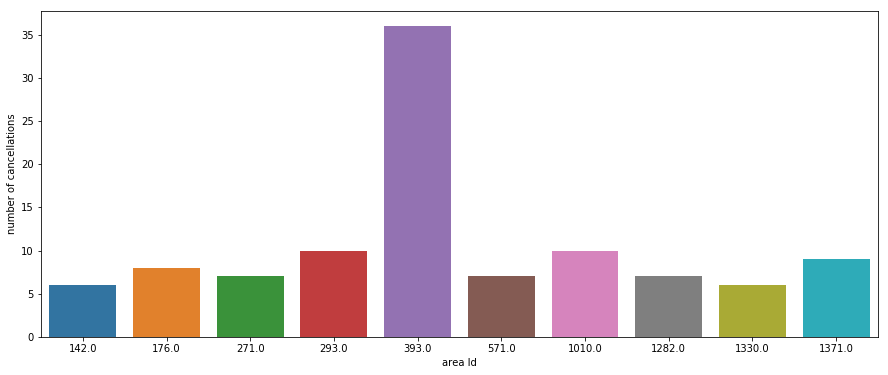

In [23]:
df_Mon_cancellation_positive = df_Mon[df_Mon['Car_Cancellation'] == 1]

cancelled_freq = Counter(df_Mon_cancellation_positive['from_area_id'])
cancelled_freq = sorted(cancelled_freq.items(), key=operator.itemgetter(1))

top_cancellation = cancelled_freq[-10:]

top_cancellation_id = []
top_cancellation_times = []
for i, j in top_cancellation:
    top_cancellation_id.append(i)
    top_cancellation_times.append(j)

fig, ax = pyplot.subplots(figsize=(15,6))
ax = sns.barplot(top_cancellation_id, top_cancellation_times, ax=ax)
ax.set(xlabel="area Id", ylabel="number of cancellations")

# Time Interval Analysis

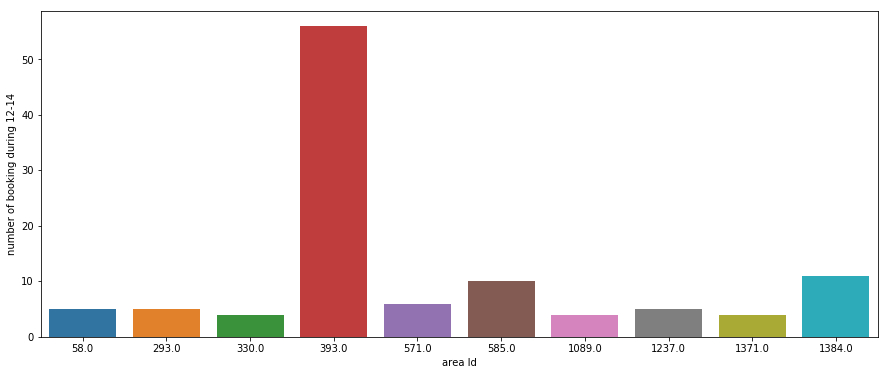

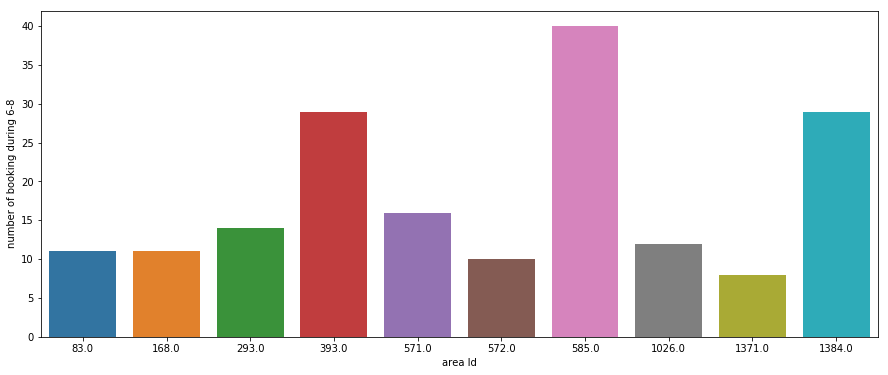

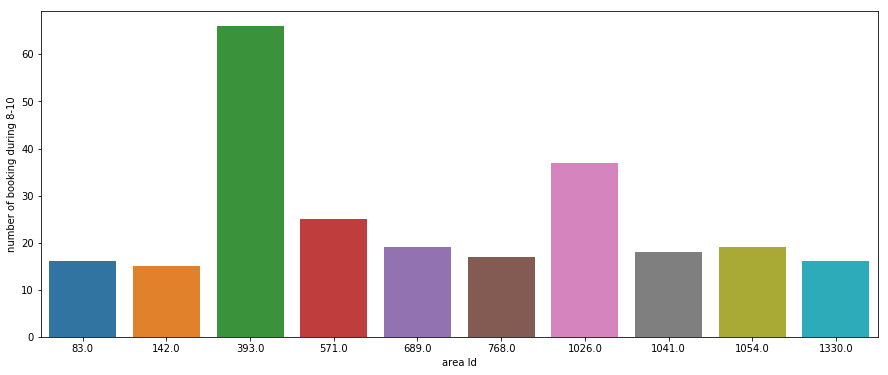

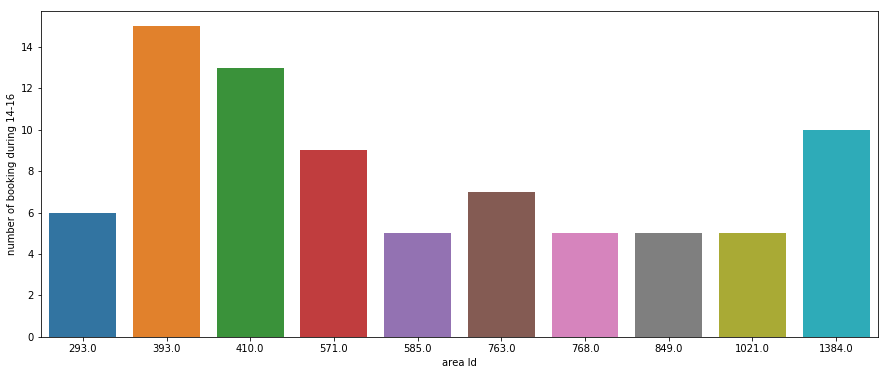

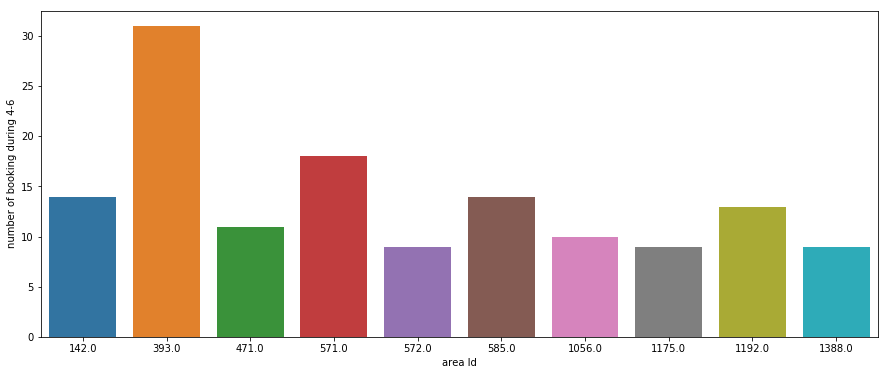

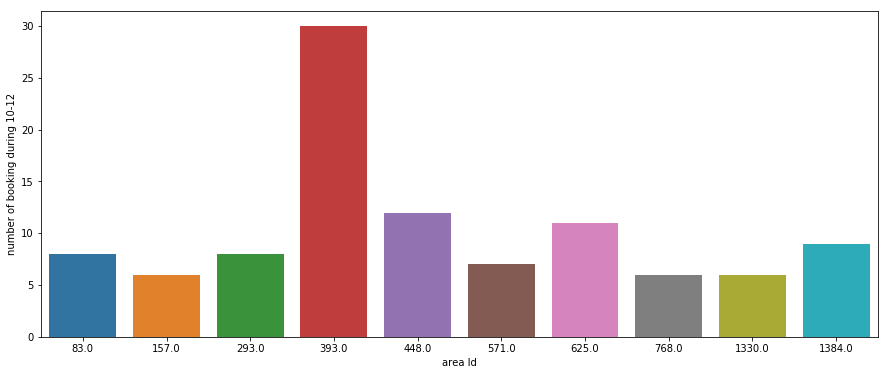

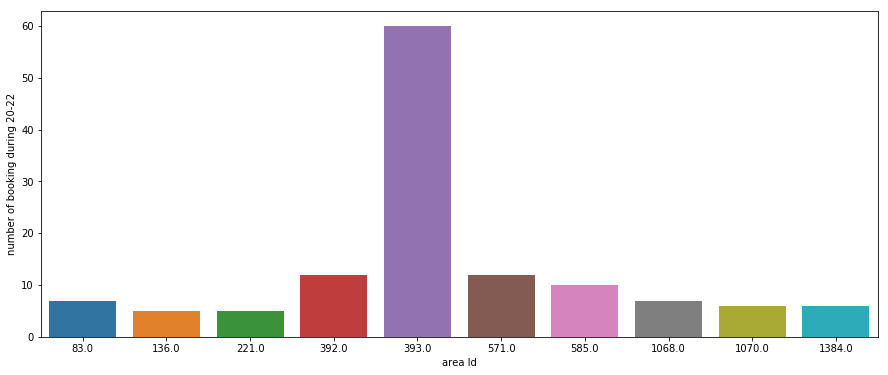

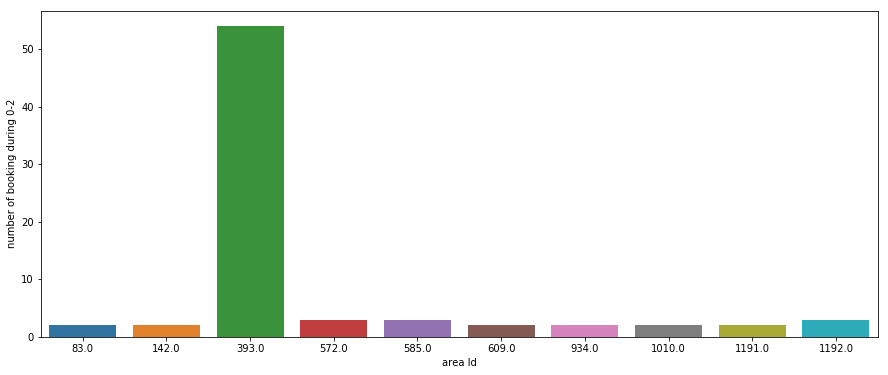

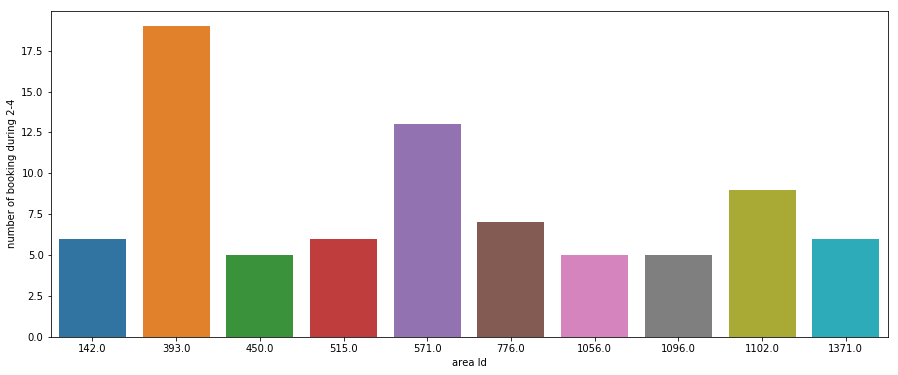

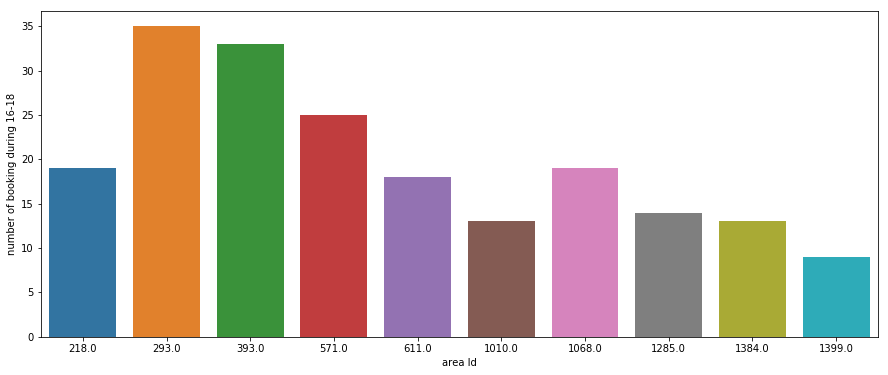

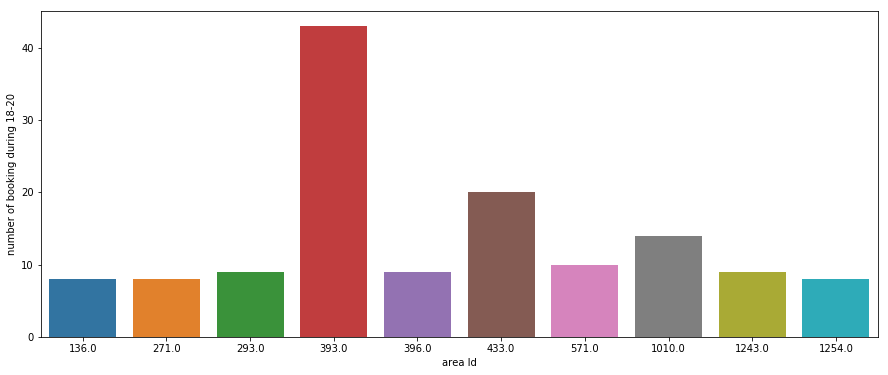

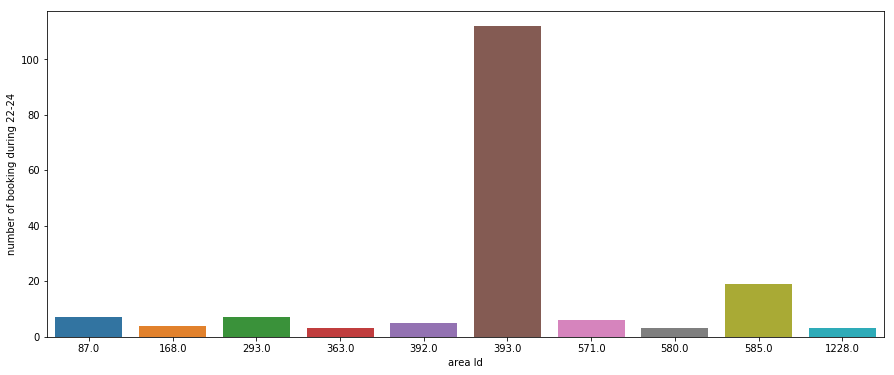

In [24]:
def timeIntervalPlotting(timeInterval):
    df_workUpon = df_Mon[df_Mon["time-interval"] == timeInterval]
    freq = Counter(df_workUpon["from_area_id"])
    freq = sorted(freq.items(), key=operator.itemgetter(1))
    top = freq[-10:]
    
    areaId = []
    booking_times = []
    for i, j in top:
        areaId.append(i)
        booking_times.append(j)
    
    fig, ax = pyplot.subplots(figsize=(15,6))
    ax = sns.barplot(areaId, booking_times, ax=ax)
    ax.set(xlabel="area Id", ylabel="number of booking during {}".format(timeInterval))

for i in df_Mon["time-interval"].unique():
    timeIntervalPlotting(i)

# Tuesday Analysis

Text(0, 0.5, 'no. of bookings')

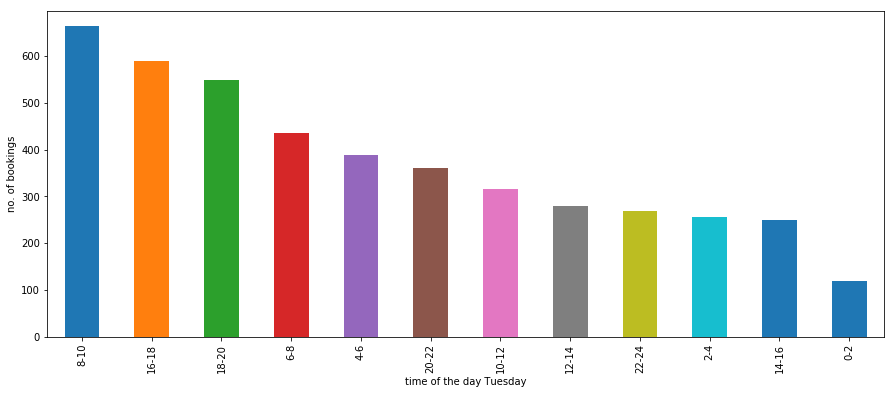

In [25]:
plot = df_Tue['time-interval'].value_counts().plot.bar(figsize=(15,6))
plot.set_xlabel("time of the day Tuesday")
plot.set_ylabel("no. of bookings")

[Text(0, 0.5, 'number of bookings'), Text(0.5, 0, 'from_Area Code')]

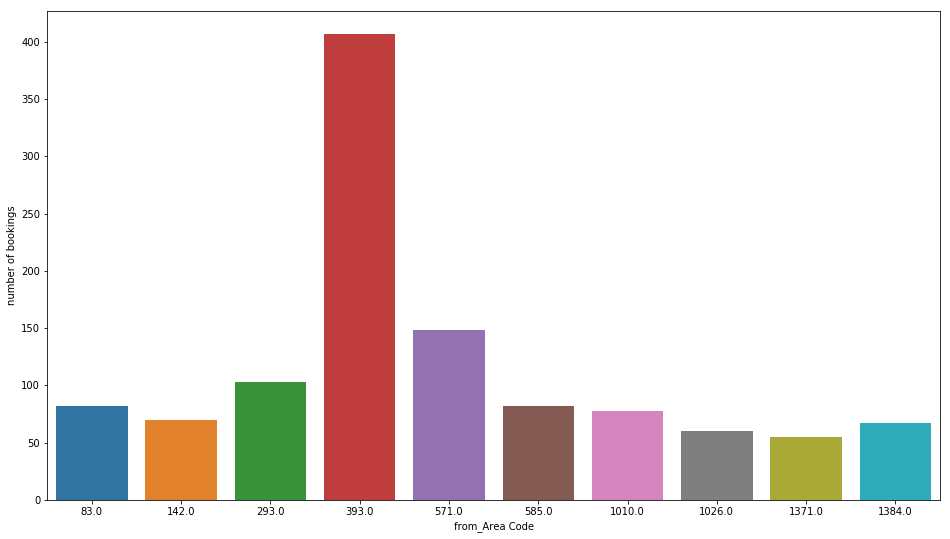

In [26]:
from_area_id_frequency = Counter(df_Tue['from_area_id'])
from_area_id_sorted = sorted(from_area_id_frequency.items(), key=operator.itemgetter(1))

top_bookings = from_area_id_sorted[-10:]

area_code = []
area_freq = []

for i, j in top_bookings:
    area_code.append(i)
    area_freq.append(j)

from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize=(16,9))
ax = sns.barplot(area_code, area_freq, ax=ax)
ax.set(xlabel="from_Area Code", ylabel="number of bookings")

# area 393 analysis

In [27]:
area_393_df = df_Tue[df_Tue['from_area_id'] == 393]

# where do people go from area 393

[Text(0, 0.5, 'number of bookings'), Text(0.5, 0, 'exact location')]

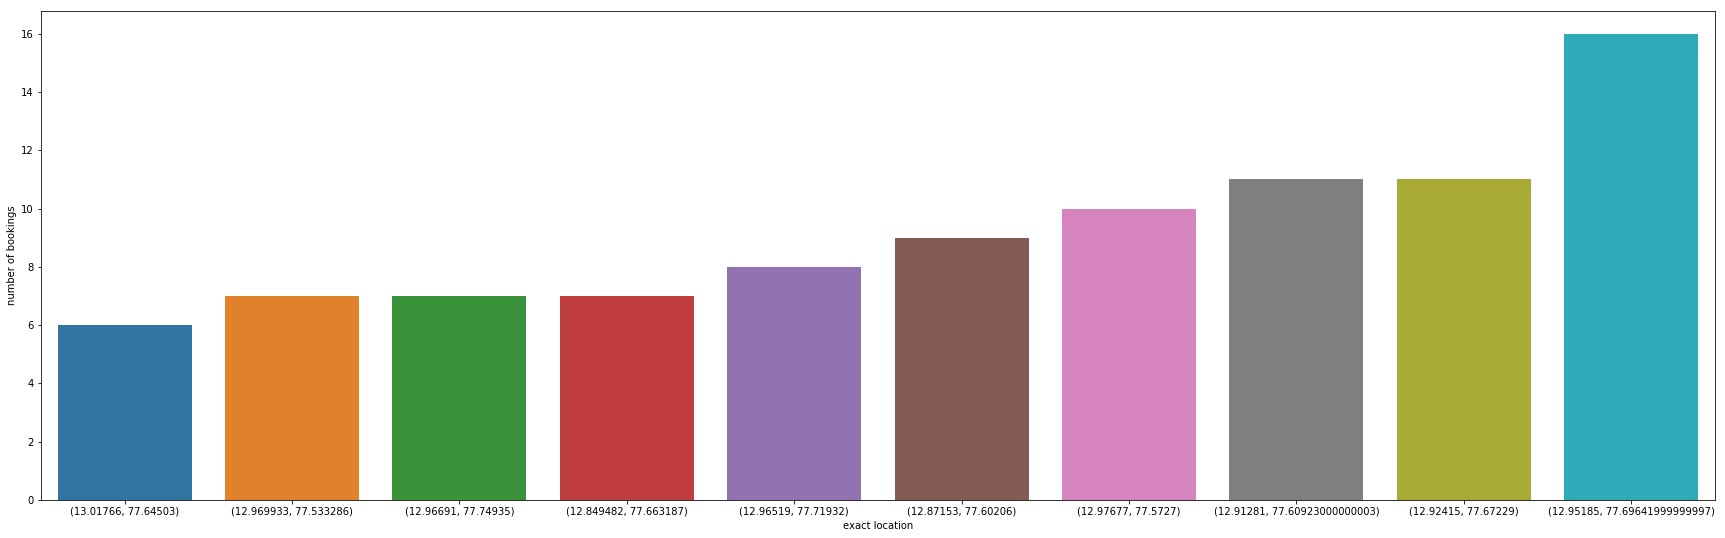

In [28]:
to_loc = list(zip(area_393_df['to_lat'], area_393_df['to_long']))
to_loc = Counter(to_loc)
to_loc = sorted(to_loc.items(), key=operator.itemgetter(1))

to_loc_top_10 = to_loc[-10:]

to_loc_top_10_exactLocation = []
to_loc_top_10_freq = []
for i, j in to_loc_top_10:
    to_loc_top_10_exactLocation.append(i)
    to_loc_top_10_freq.append(j)

to_loc_top_10_exactLocation = [str(i) for i in to_loc_top_10_exactLocation]

fig, ax = pyplot.subplots(figsize=(30,9))
ax = sns.barplot(to_loc_top_10_exactLocation, to_loc_top_10_freq, ax=ax)
ax.set(xlabel="exact location", ylabel="number of bookings")

# Cancellation

[Text(0, 0.5, 'number of cancellations'), Text(0.5, 0, 'area Id')]

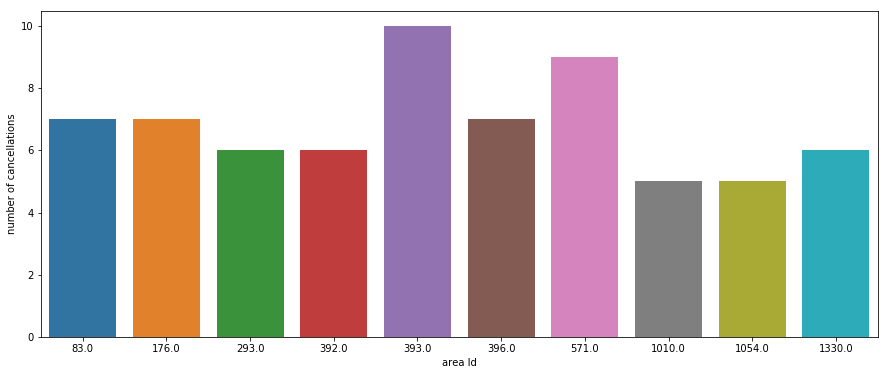

In [29]:
df_Tue_cancellation_positive = df_Tue[df_Tue['Car_Cancellation'] == 1]

cancelled_freq = Counter(df_Tue_cancellation_positive['from_area_id'])
cancelled_freq = sorted(cancelled_freq.items(), key=operator.itemgetter(1))

top_cancellation = cancelled_freq[-10:]

top_cancellation_id = []
top_cancellation_times = []
for i, j in top_cancellation:
    top_cancellation_id.append(i)
    top_cancellation_times.append(j)

fig, ax = pyplot.subplots(figsize=(15,6))
ax = sns.barplot(top_cancellation_id, top_cancellation_times, ax=ax)
ax.set(xlabel="area Id", ylabel="number of cancellations")

# Time Interval Analysis

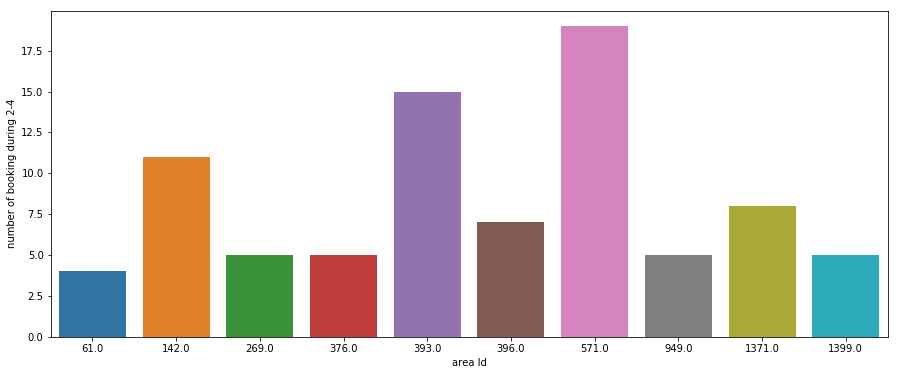

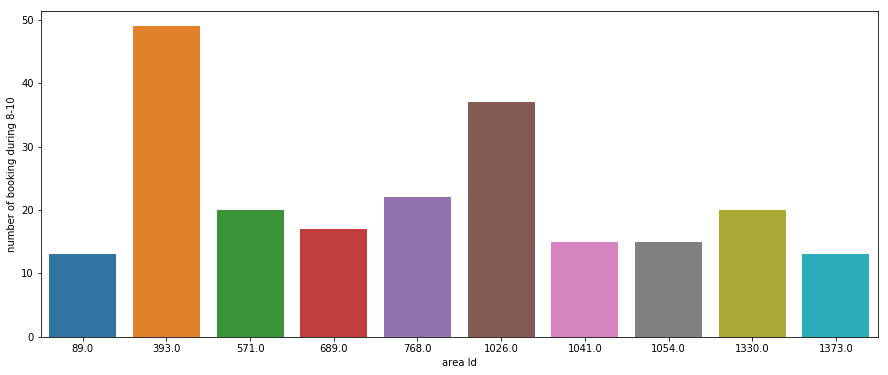

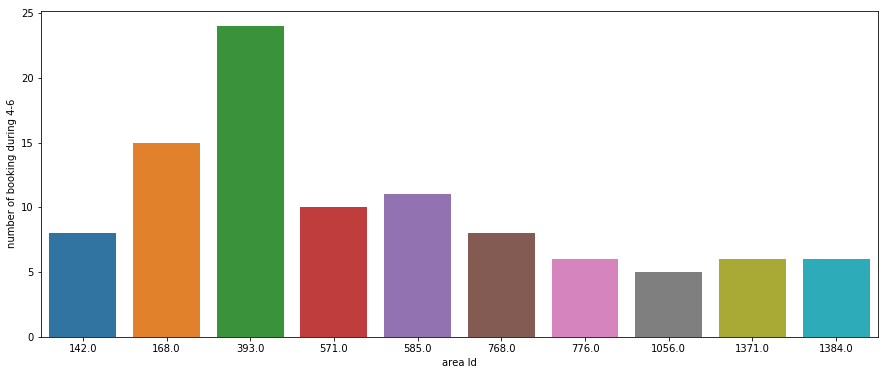

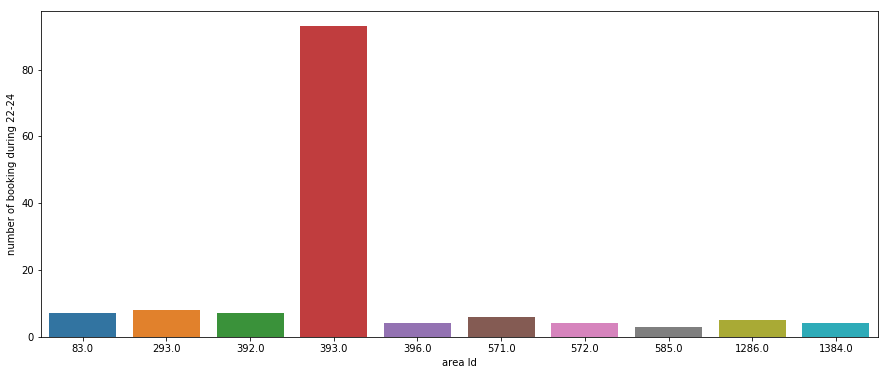

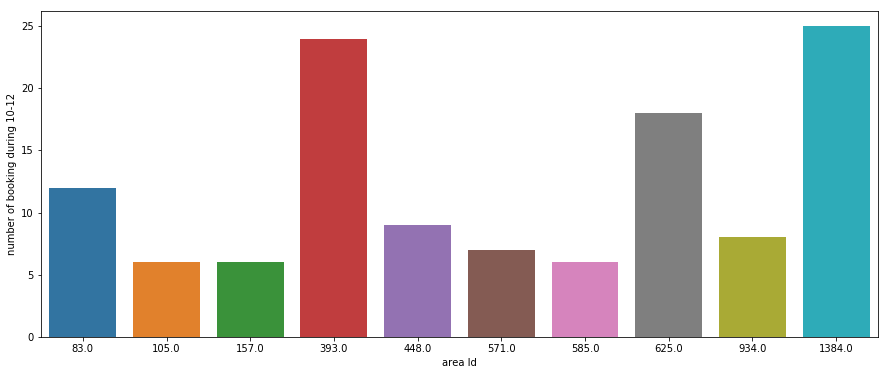

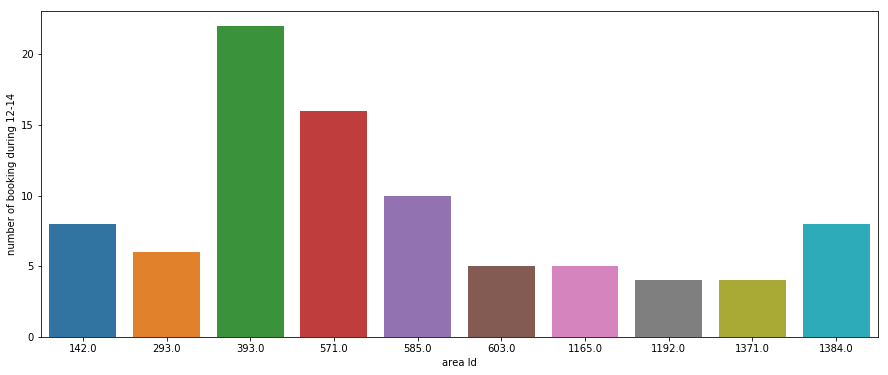

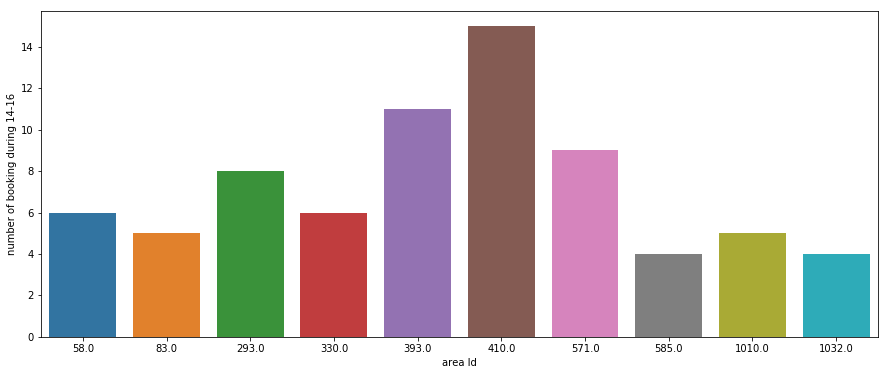

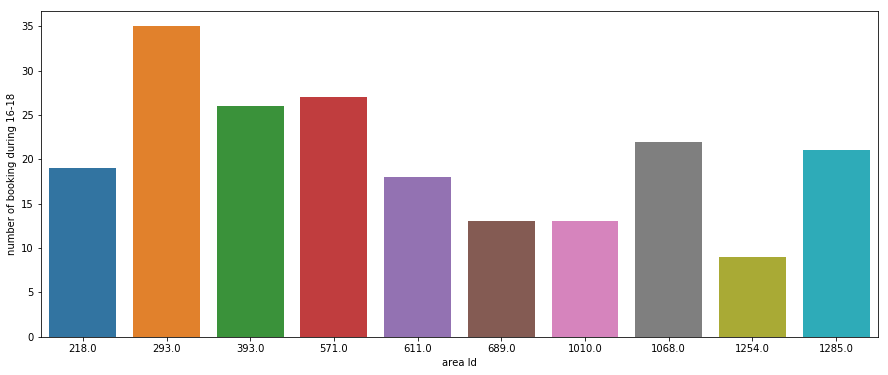

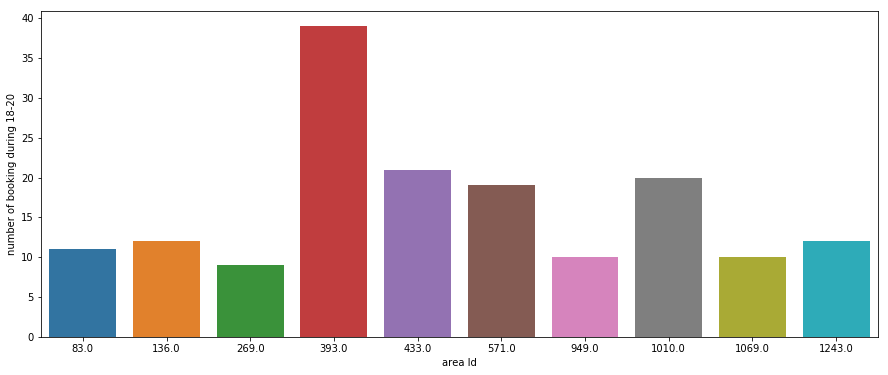

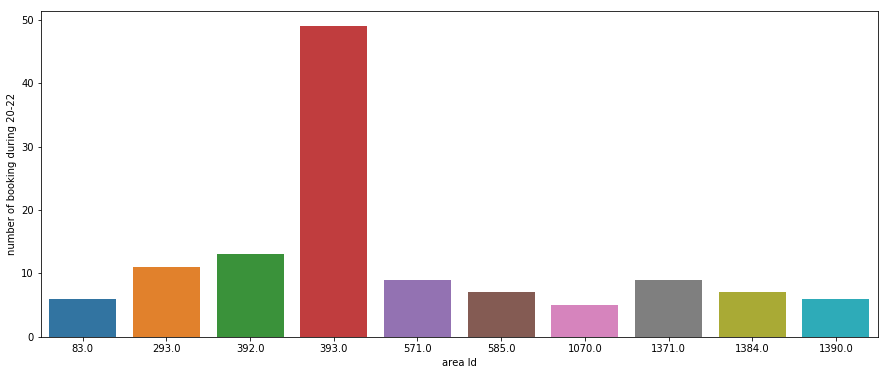

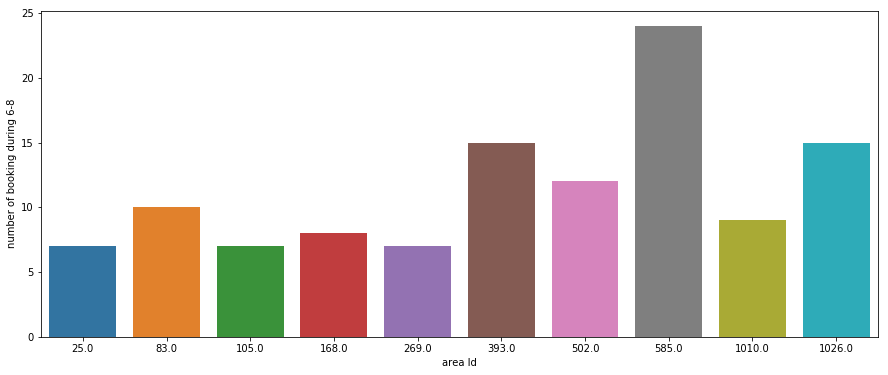

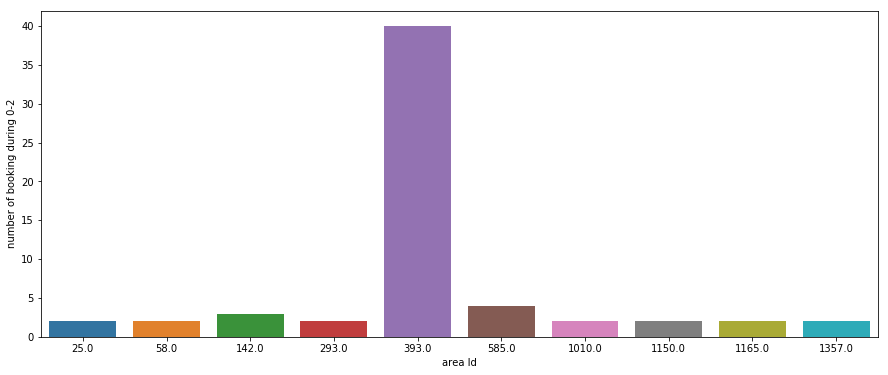

In [30]:
def timeIntervalPlotting(timeInterval):
    df_workUpon = df_Tue[df_Tue["time-interval"] == timeInterval]
    freq = Counter(df_workUpon["from_area_id"])
    freq = sorted(freq.items(), key=operator.itemgetter(1))
    top = freq[-10:]
    
    areaId = []
    booking_times = []
    for i, j in top:
        areaId.append(i)
        booking_times.append(j)
    
    fig, ax = pyplot.subplots(figsize=(15,6))
    ax = sns.barplot(areaId, booking_times, ax=ax)
    ax.set(xlabel="area Id", ylabel="number of booking during {}".format(timeInterval))

for i in df_Tue["time-interval"].unique():
    timeIntervalPlotting(i)

# Wednesday analysis

Text(0, 0.5, 'no. of bookings')

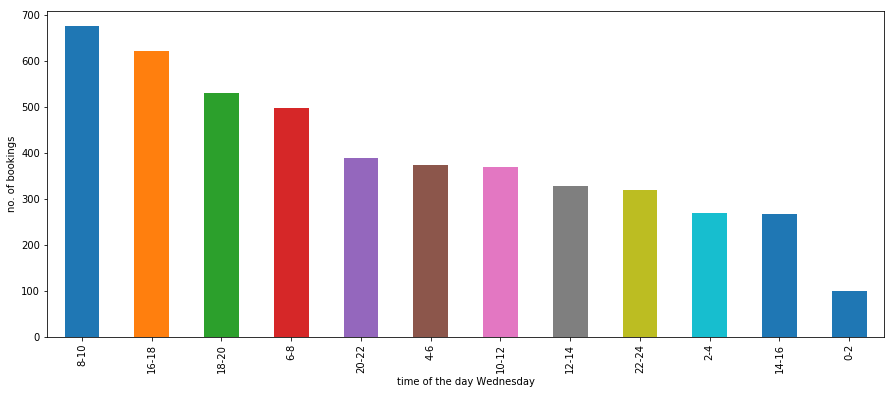

In [31]:
plot = df_wed['time-interval'].value_counts().plot.bar(figsize=(15,6))
plot.set_xlabel("time of the day Wednesday")
plot.set_ylabel("no. of bookings")

[Text(0, 0.5, 'number of bookings'), Text(0.5, 0, 'from_Area Code')]

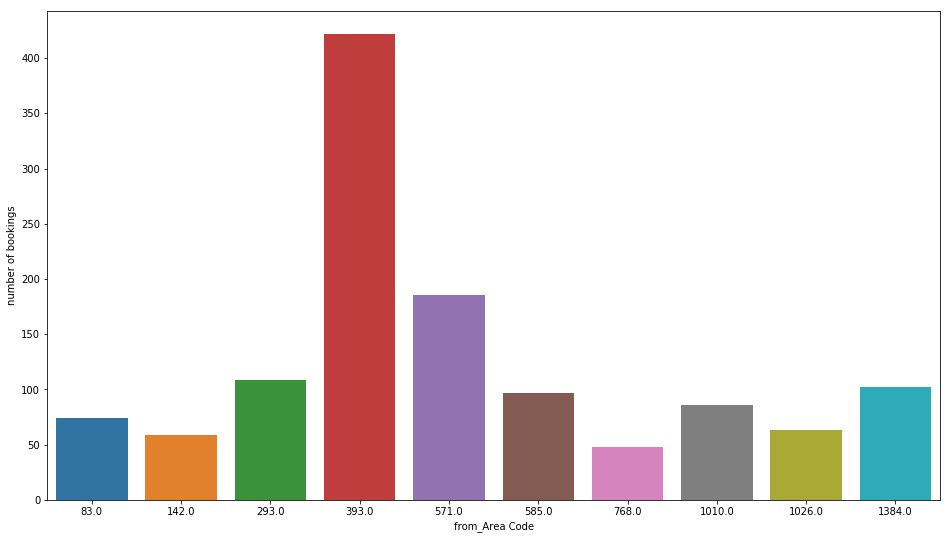

In [32]:
from_area_id_frequency = Counter(df_wed['from_area_id'])
from_area_id_sorted = sorted(from_area_id_frequency.items(), key=operator.itemgetter(1))

top_bookings = from_area_id_sorted[-10:]

area_code = []
area_freq = []

for i, j in top_bookings:
    area_code.append(i)
    area_freq.append(j)

from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize=(16,9))
ax = sns.barplot(area_code, area_freq, ax=ax)
ax.set(xlabel="from_Area Code", ylabel="number of bookings")

# area 393 analysis

In [33]:
area_393_df = df_wed[df_wed['from_area_id'] == 393]

# where do people go from 393

[Text(0, 0.5, 'number of bookings'), Text(0.5, 0, 'exact location')]

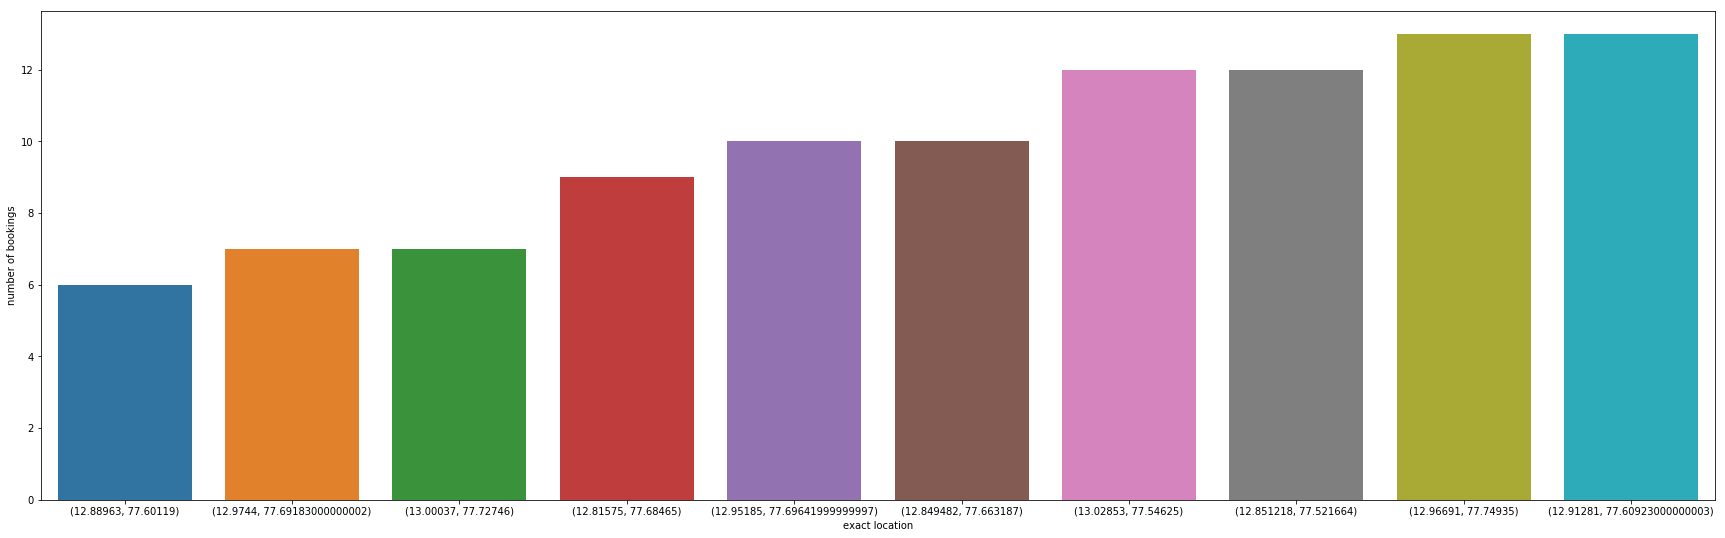

In [34]:
to_loc = list(zip(area_393_df['to_lat'], area_393_df['to_long']))
to_loc = Counter(to_loc)
to_loc = sorted(to_loc.items(), key=operator.itemgetter(1))

to_loc_top_10 = to_loc[-10:]

to_loc_top_10_exactLocation = []
to_loc_top_10_freq = []
for i, j in to_loc_top_10:
    to_loc_top_10_exactLocation.append(i)
    to_loc_top_10_freq.append(j)

to_loc_top_10_exactLocation = [str(i) for i in to_loc_top_10_exactLocation]

fig, ax = pyplot.subplots(figsize=(30,9))
ax = sns.barplot(to_loc_top_10_exactLocation, to_loc_top_10_freq, ax=ax)
ax.set(xlabel="exact location", ylabel="number of bookings")

# Cancellation

[Text(0, 0.5, 'number of cancellations'), Text(0.5, 0, 'area Id')]

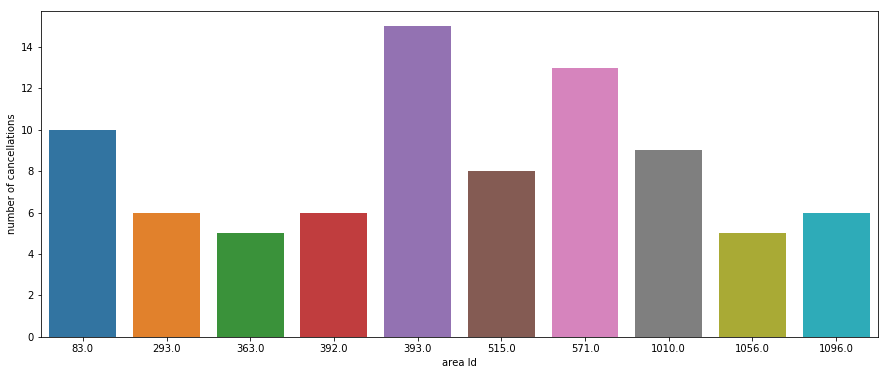

In [35]:
df_wed_cancellation_positive = df_wed[df_wed['Car_Cancellation'] == 1]

cancelled_freq = Counter(df_wed_cancellation_positive['from_area_id'])
cancelled_freq = sorted(cancelled_freq.items(), key=operator.itemgetter(1))

top_cancellation = cancelled_freq[-10:]

top_cancellation_id = []
top_cancellation_times = []
for i, j in top_cancellation:
    top_cancellation_id.append(i)
    top_cancellation_times.append(j)

fig, ax = pyplot.subplots(figsize=(15,6))
ax = sns.barplot(top_cancellation_id, top_cancellation_times, ax=ax)
ax.set(xlabel="area Id", ylabel="number of cancellations")

# Time Interval Analysis

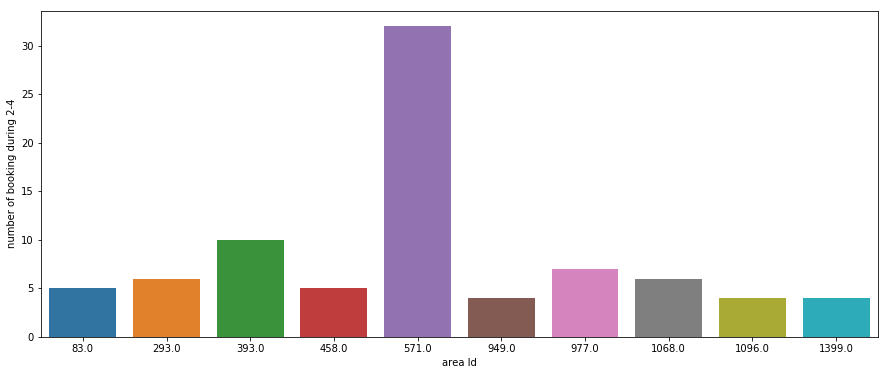

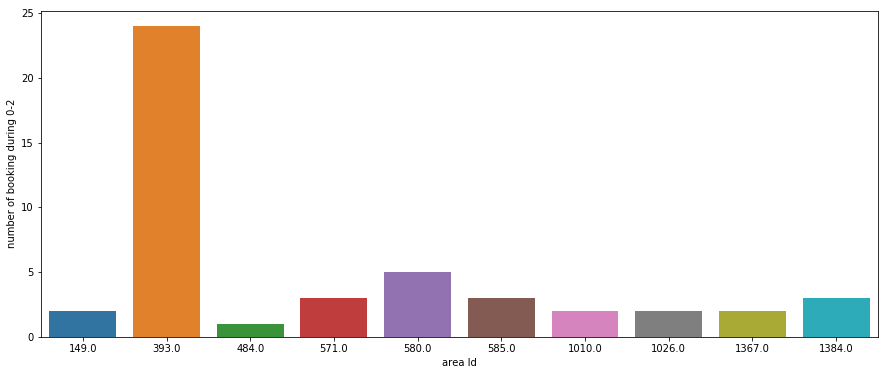

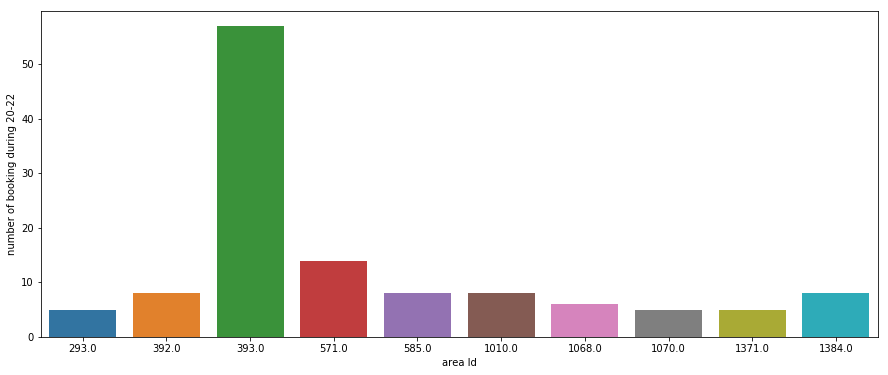

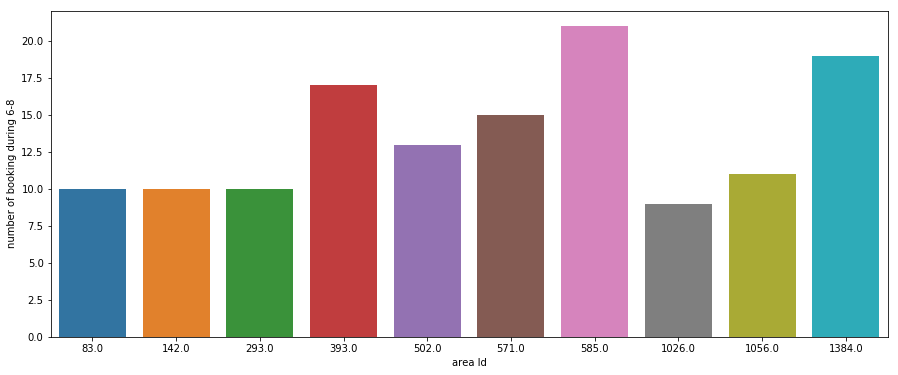

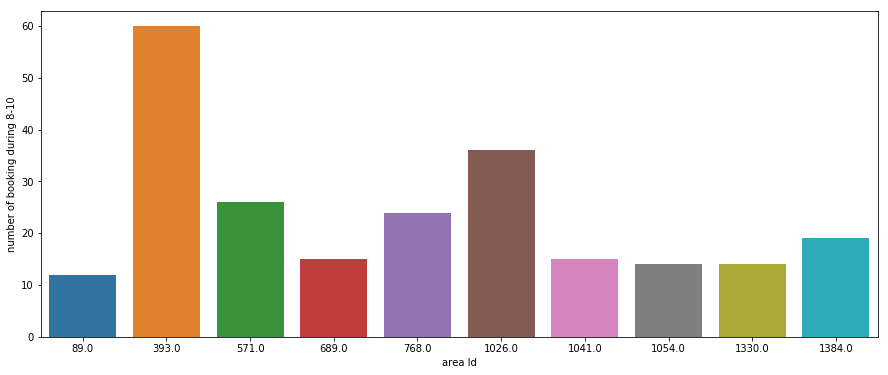

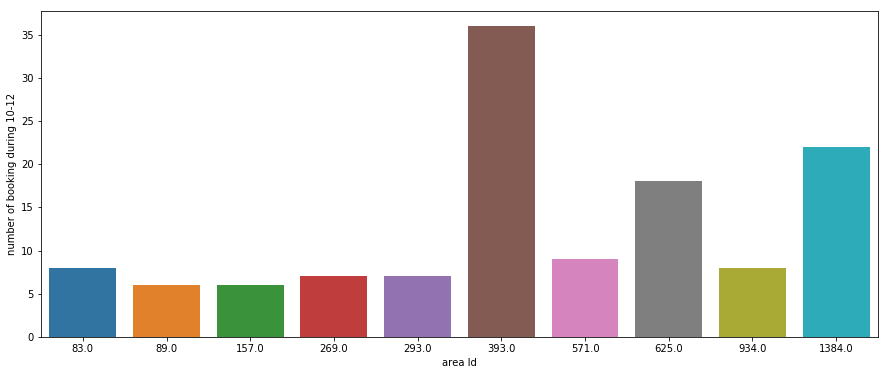

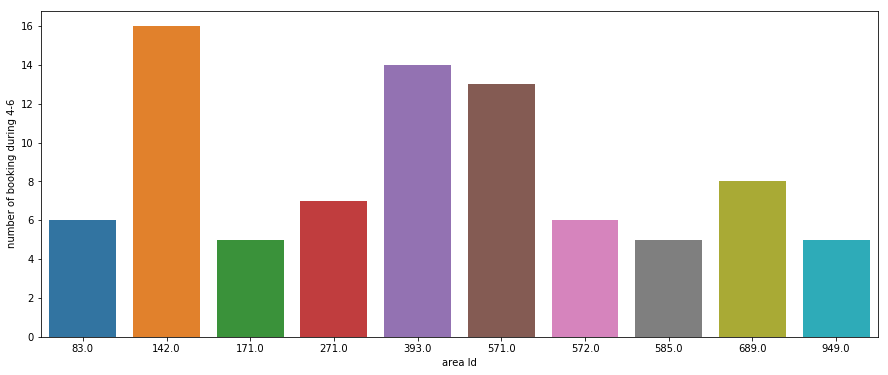

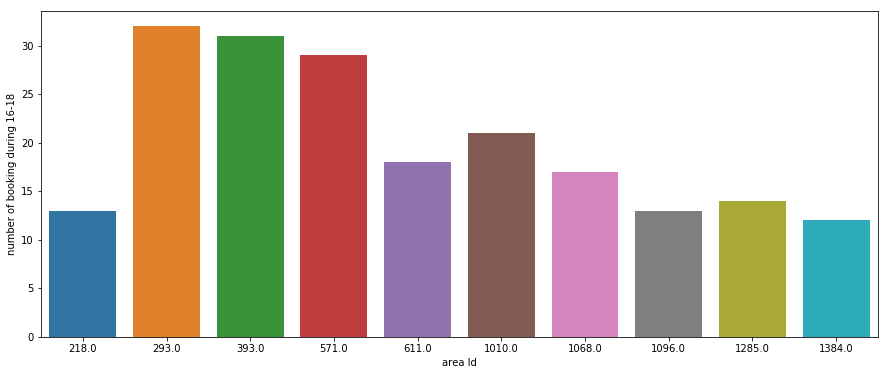

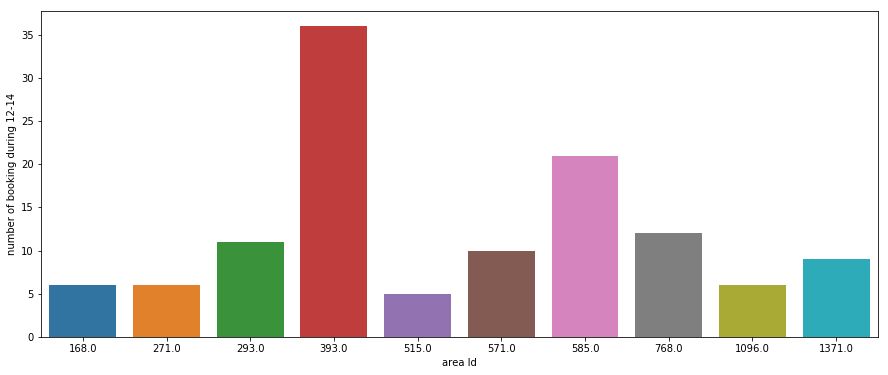

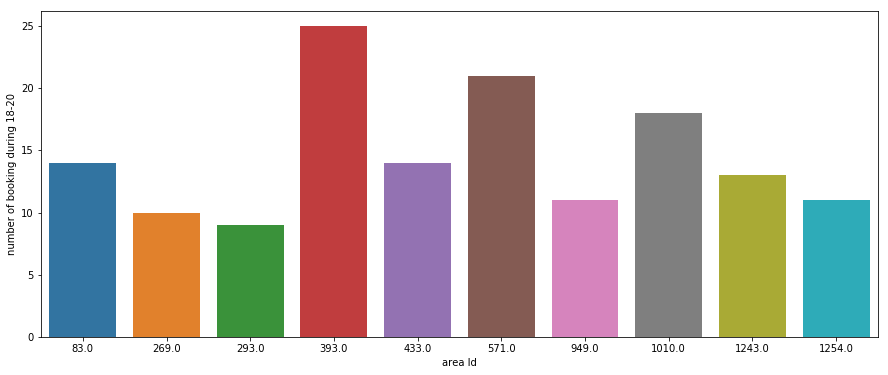

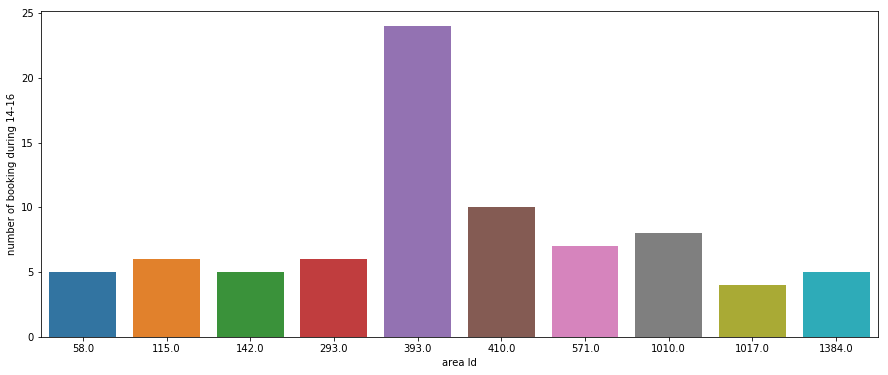

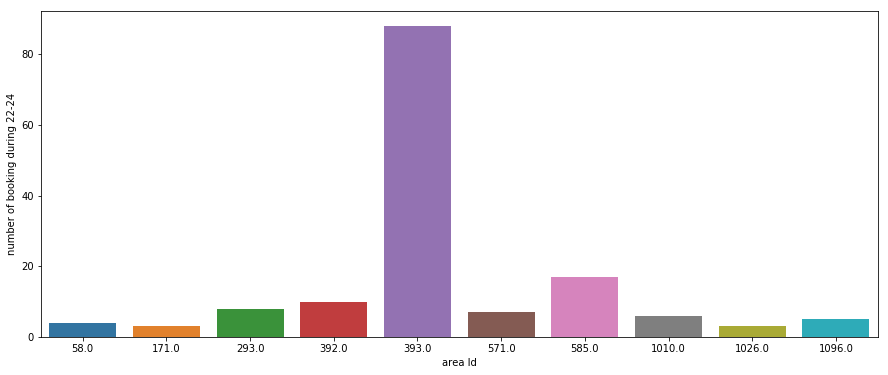

In [36]:
def timeIntervalPlotting(timeInterval):
    df_workUpon = df_wed[df_wed["time-interval"] == timeInterval]
    freq = Counter(df_workUpon["from_area_id"])
    freq = sorted(freq.items(), key=operator.itemgetter(1))
    top = freq[-10:]
    
    areaId = []
    booking_times = []
    for i, j in top:
        areaId.append(i)
        booking_times.append(j)
    
    fig, ax = pyplot.subplots(figsize=(15,6))
    ax = sns.barplot(areaId, booking_times, ax=ax)
    ax.set(xlabel="area Id", ylabel="number of booking during {}".format(timeInterval))

for i in df_wed["time-interval"].unique():
    timeIntervalPlotting(i)

# Thursday Analysis

Text(0, 0.5, 'no. of bookings')

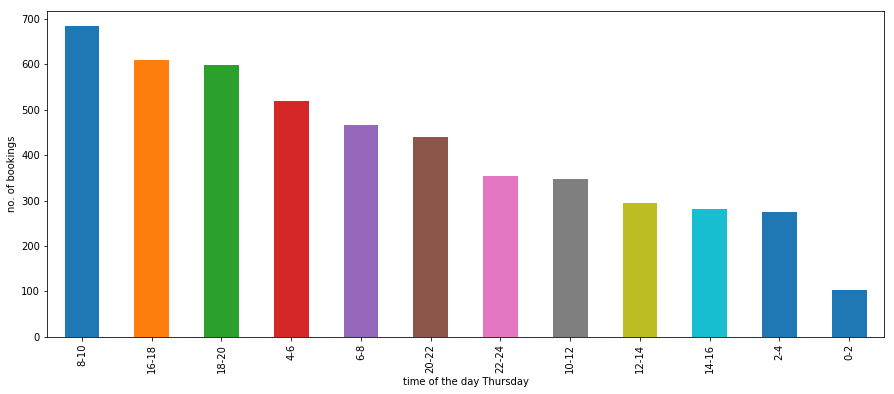

In [37]:
plot = df_thurs['time-interval'].value_counts().plot.bar(figsize=(15,6))
plot.set_xlabel("time of the day Thursday")
plot.set_ylabel("no. of bookings")

[Text(0, 0.5, 'number of bookings'), Text(0.5, 0, 'from_Area Code')]

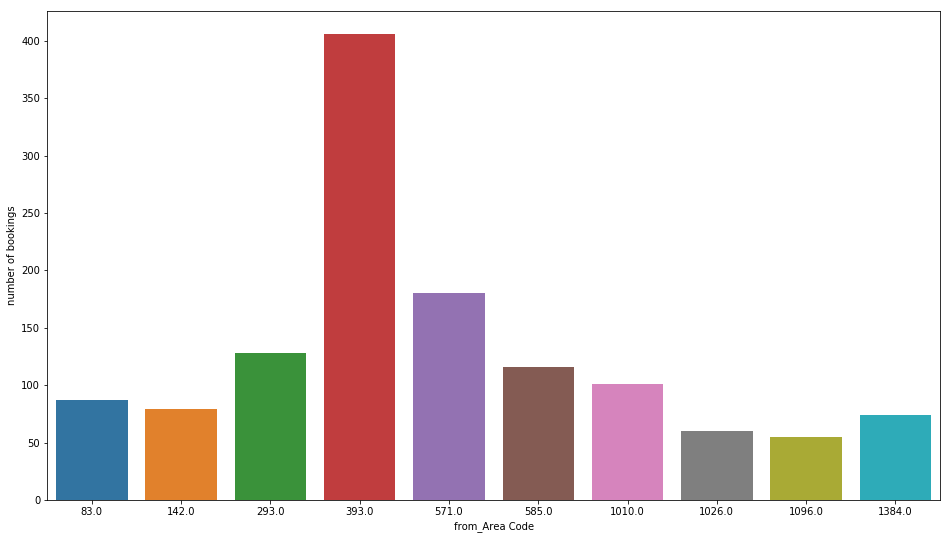

In [38]:
from_area_id_frequency = Counter(df_thurs['from_area_id'])
from_area_id_sorted = sorted(from_area_id_frequency.items(), key=operator.itemgetter(1))

top_bookings = from_area_id_sorted[-10:]

area_code = []
area_freq = []

for i, j in top_bookings:
    area_code.append(i)
    area_freq.append(j)

from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize=(16,9))
ax = sns.barplot(area_code, area_freq, ax=ax)
ax.set(xlabel="from_Area Code", ylabel="number of bookings")

# 393 analysis

In [39]:
area_393_df = df_thurs[df_thurs['from_area_id'] == 393]

# where do people go from 393

[Text(0, 0.5, 'number of bookings'), Text(0.5, 0, 'exact location')]

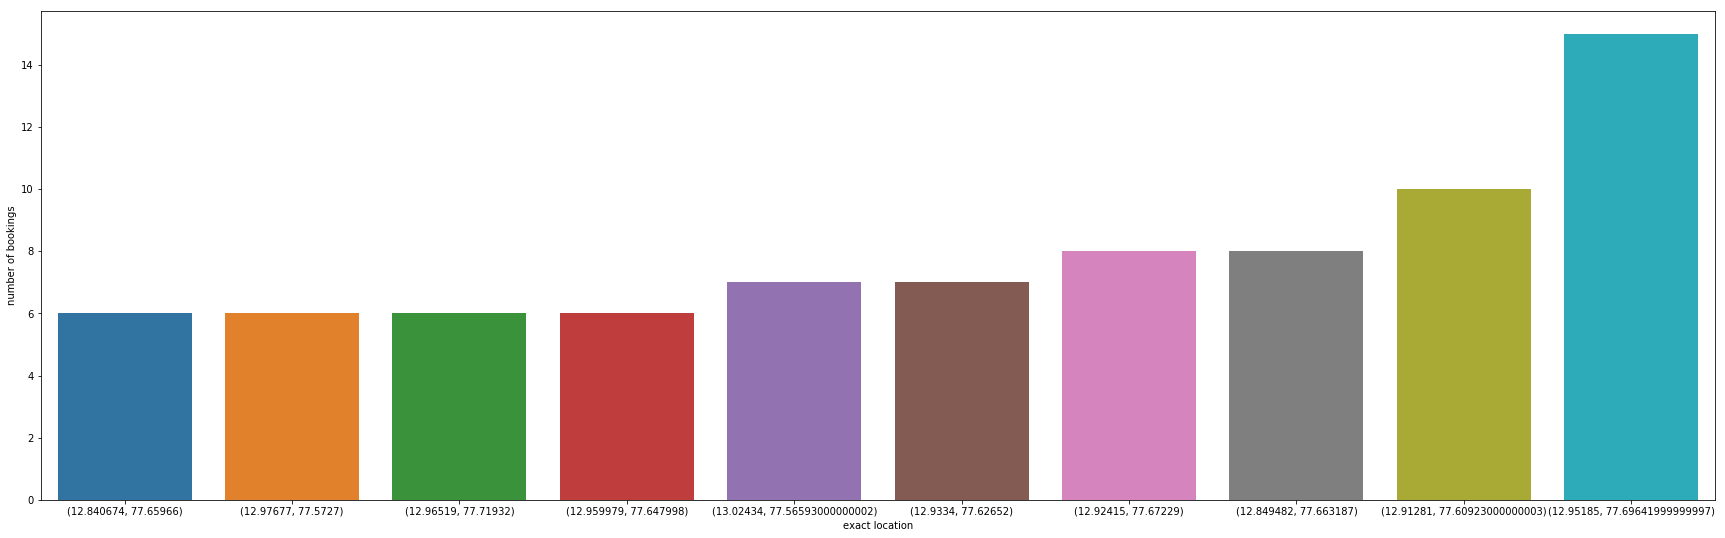

In [40]:
to_loc = list(zip(area_393_df['to_lat'], area_393_df['to_long']))
to_loc = Counter(to_loc)
to_loc = sorted(to_loc.items(), key=operator.itemgetter(1))

to_loc_top_10 = to_loc[-10:]

to_loc_top_10_exactLocation = []
to_loc_top_10_freq = []
for i, j in to_loc_top_10:
    to_loc_top_10_exactLocation.append(i)
    to_loc_top_10_freq.append(j)

to_loc_top_10_exactLocation = [str(i) for i in to_loc_top_10_exactLocation]

fig, ax = pyplot.subplots(figsize=(30,9))
ax = sns.barplot(to_loc_top_10_exactLocation, to_loc_top_10_freq, ax=ax)
ax.set(xlabel="exact location", ylabel="number of bookings")

# Cancellation

[Text(0, 0.5, 'number of cancellations'), Text(0.5, 0, 'area Id')]

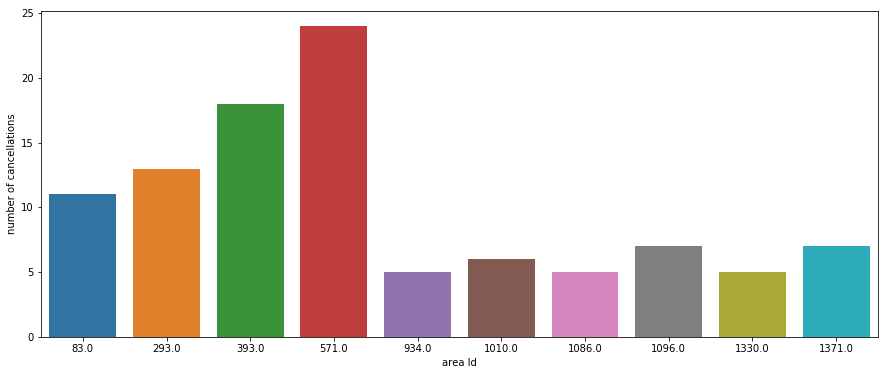

In [41]:
df_thurs_cancellation_positive = df_thurs[df_thurs['Car_Cancellation'] == 1]

cancelled_freq = Counter(df_thurs_cancellation_positive['from_area_id'])
cancelled_freq = sorted(cancelled_freq.items(), key=operator.itemgetter(1))

top_cancellation = cancelled_freq[-10:]

top_cancellation_id = []
top_cancellation_times = []
for i, j in top_cancellation:
    top_cancellation_id.append(i)
    top_cancellation_times.append(j)

fig, ax = pyplot.subplots(figsize=(15,6))
ax = sns.barplot(top_cancellation_id, top_cancellation_times, ax=ax)
ax.set(xlabel="area Id", ylabel="number of cancellations")

# Time Interval Analysis

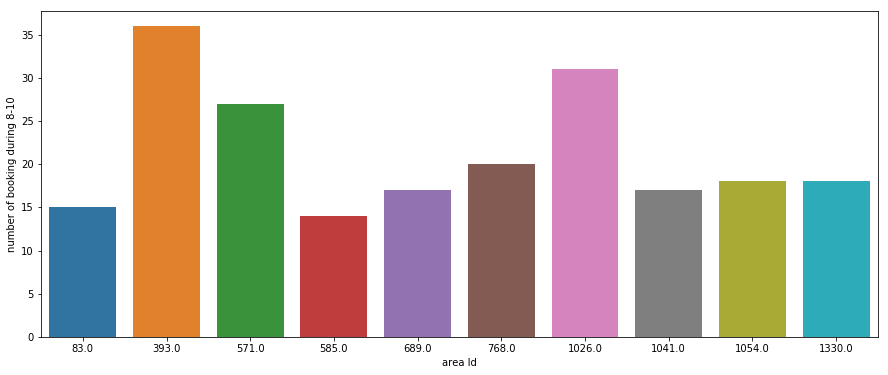

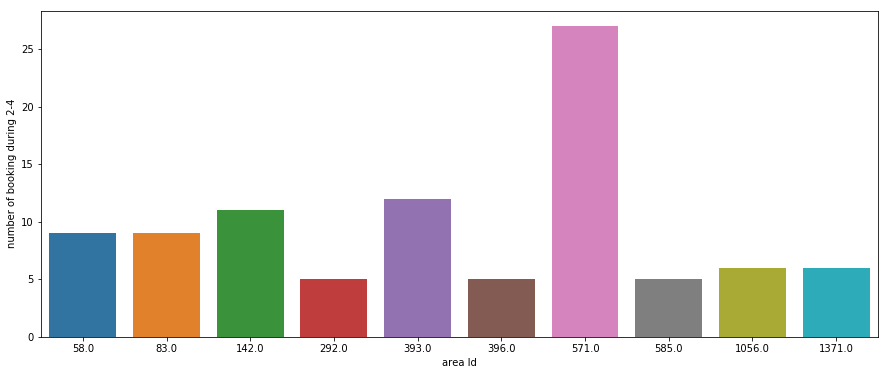

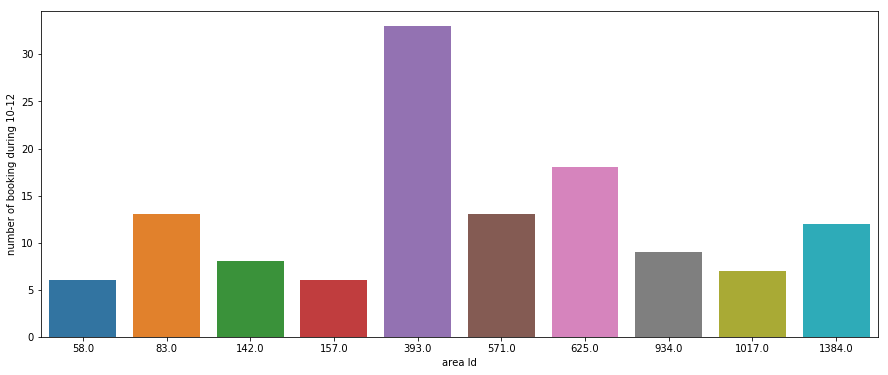

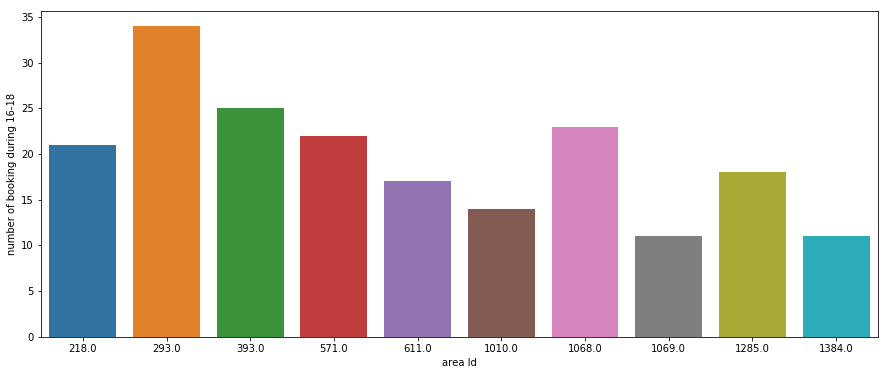

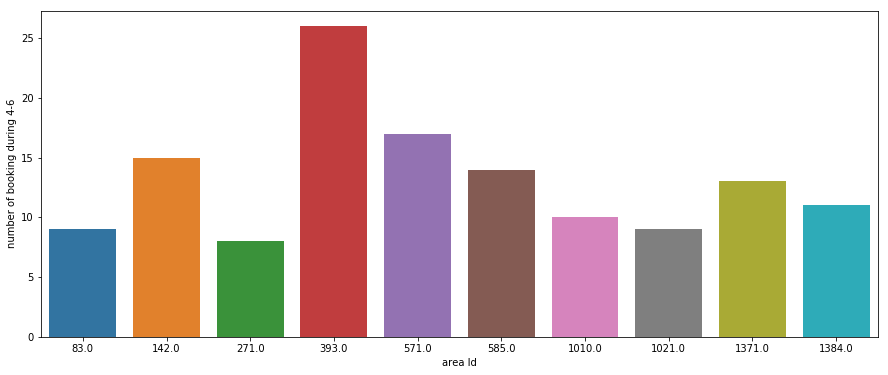

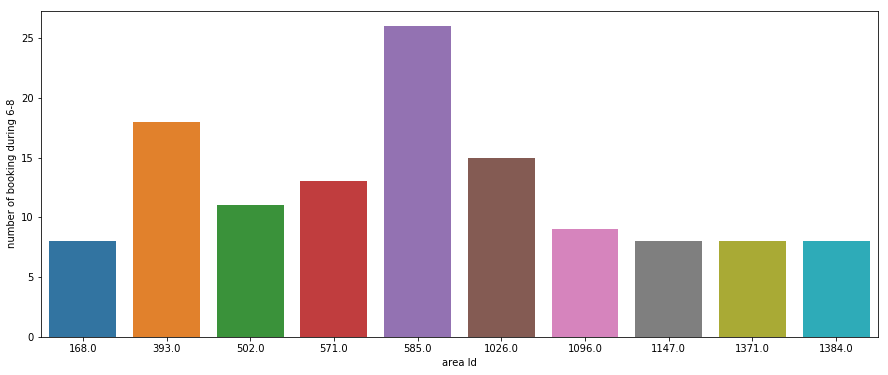

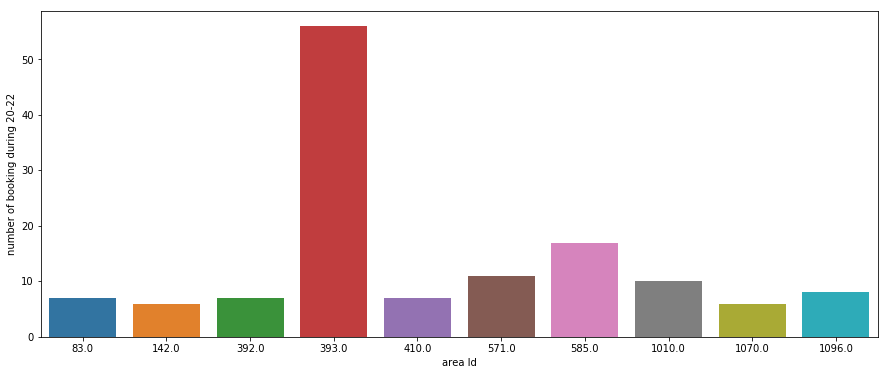

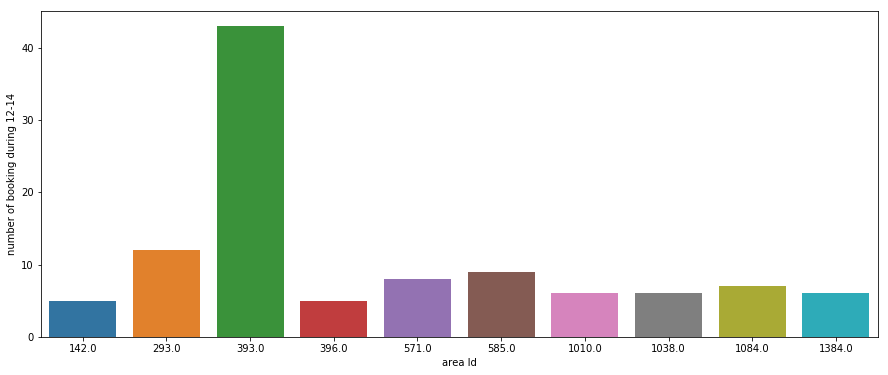

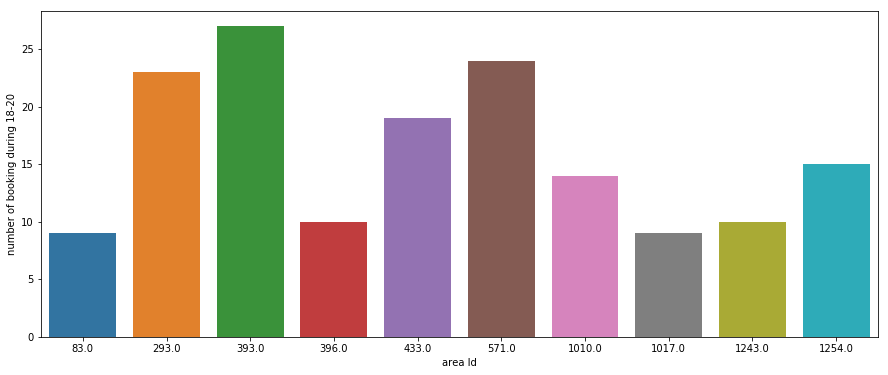

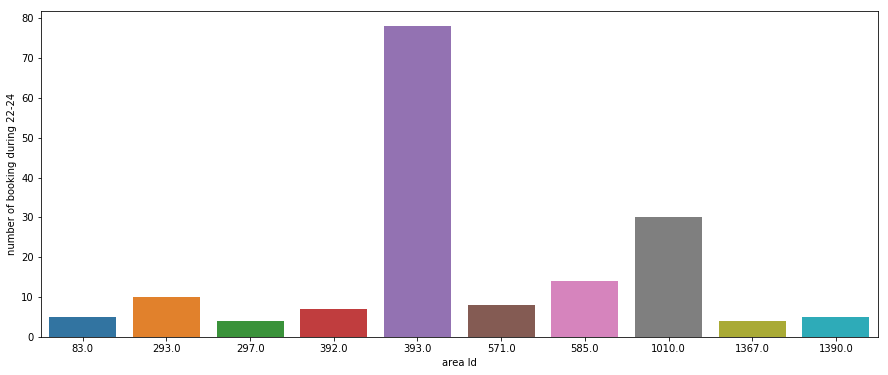

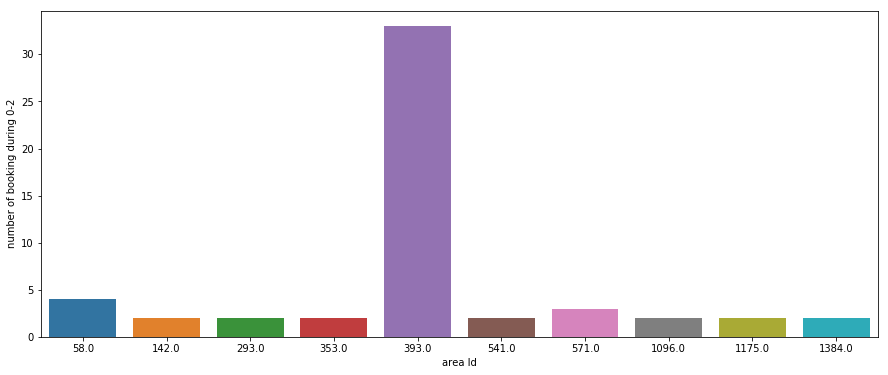

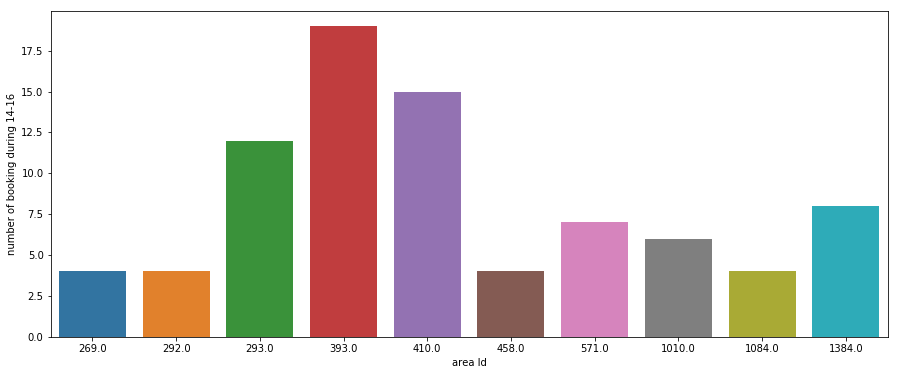

In [42]:
def timeIntervalPlotting(timeInterval):
    df_workUpon = df_thurs[df_thurs["time-interval"] == timeInterval]
    freq = Counter(df_workUpon["from_area_id"])
    freq = sorted(freq.items(), key=operator.itemgetter(1))
    top = freq[-10:]
    
    areaId = []
    booking_times = []
    for i, j in top:
        areaId.append(i)
        booking_times.append(j)
    
    fig, ax = pyplot.subplots(figsize=(15,6))
    ax = sns.barplot(areaId, booking_times, ax=ax)
    ax.set(xlabel="area Id", ylabel="number of booking during {}".format(timeInterval))

for i in df_thurs["time-interval"].unique():
    timeIntervalPlotting(i)

# Friday Analysis

Text(0, 0.5, 'no. of bookings')

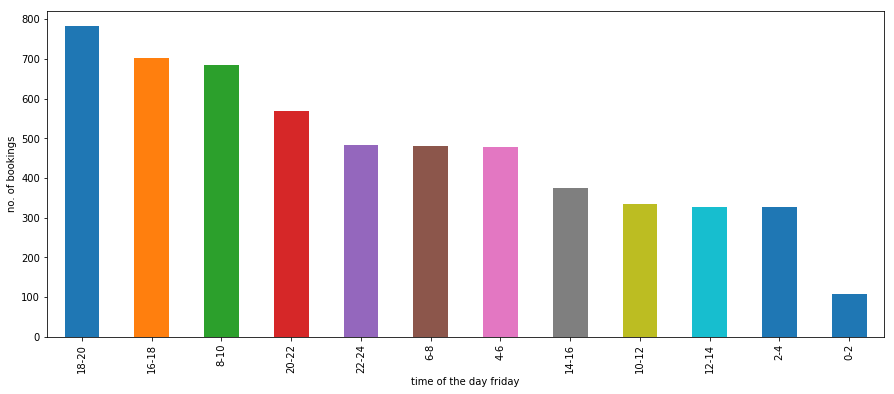

In [43]:
plot = df_fri['time-interval'].value_counts().plot.bar(figsize=(15,6))
plot.set_xlabel("time of the day friday")
plot.set_ylabel("no. of bookings")

[Text(0, 0.5, 'number of bookings'), Text(0.5, 0, 'from_Area Code')]

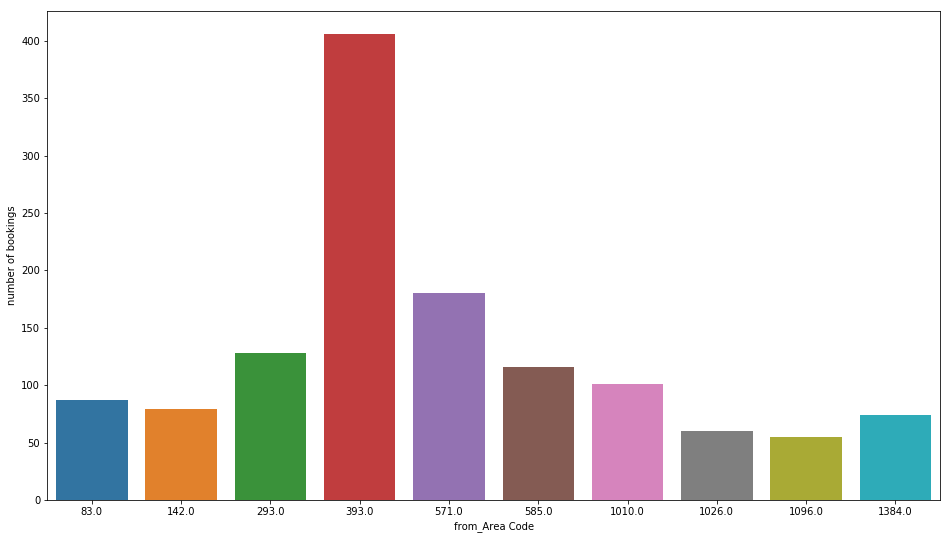

In [44]:
from_area_id_frequency = Counter(df_thurs['from_area_id'])
from_area_id_sorted = sorted(from_area_id_frequency.items(), key=operator.itemgetter(1))

top_bookings = from_area_id_sorted[-10:]

area_code = []
area_freq = []

for i, j in top_bookings:
    area_code.append(i)
    area_freq.append(j)

from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize=(16,9))
ax = sns.barplot(area_code, area_freq, ax=ax)
ax.set(xlabel="from_Area Code", ylabel="number of bookings")

# 393 analysis

In [45]:
area_393_df = df_fri[df_fri['from_area_id'] == 393]

# where do people go from 393

[Text(0, 0.5, 'number of bookings'), Text(0.5, 0, 'exact location')]

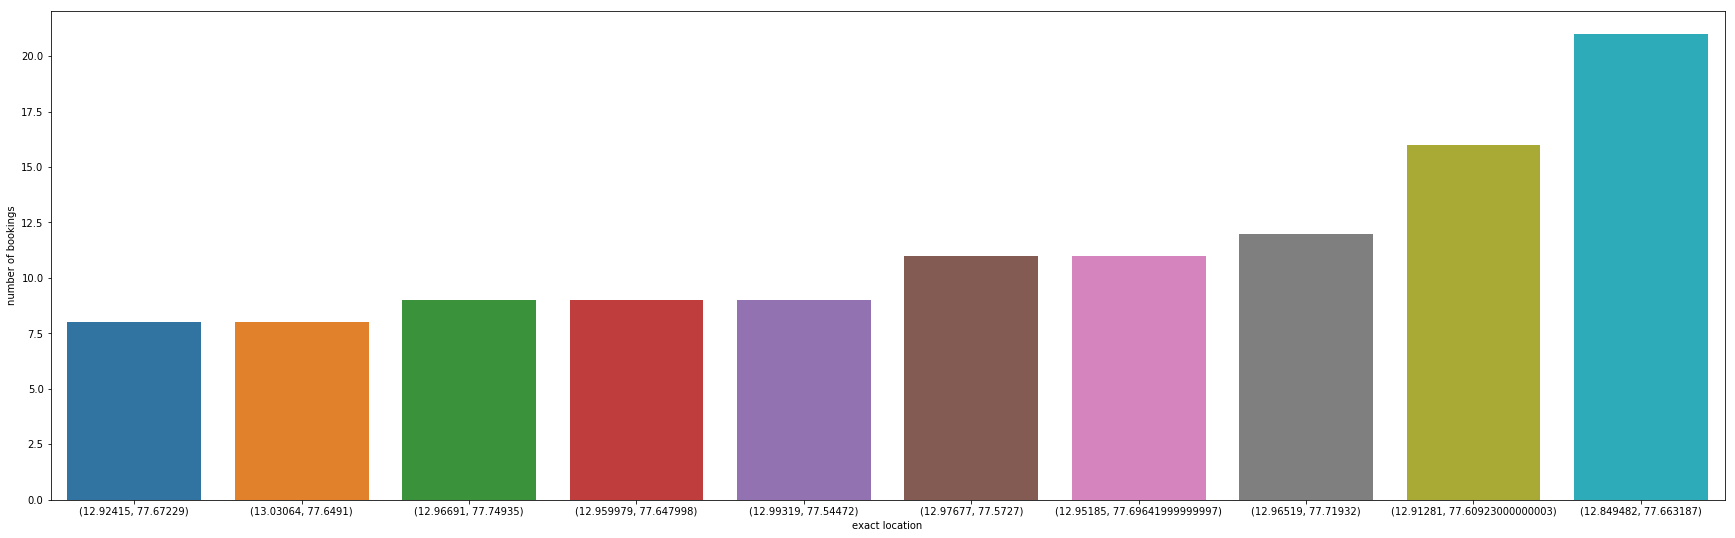

In [46]:
to_loc = list(zip(area_393_df['to_lat'], area_393_df['to_long']))
to_loc = Counter(to_loc)
to_loc = sorted(to_loc.items(), key=operator.itemgetter(1))

to_loc_top_10 = to_loc[-10:]

to_loc_top_10_exactLocation = []
to_loc_top_10_freq = []
for i, j in to_loc_top_10:
    to_loc_top_10_exactLocation.append(i)
    to_loc_top_10_freq.append(j)

to_loc_top_10_exactLocation = [str(i) for i in to_loc_top_10_exactLocation]

fig, ax = pyplot.subplots(figsize=(30,9))
ax = sns.barplot(to_loc_top_10_exactLocation, to_loc_top_10_freq, ax=ax)
ax.set(xlabel="exact location", ylabel="number of bookings")

# Cancellation

[Text(0, 0.5, 'number of cancellations'), Text(0.5, 0, 'area Id')]

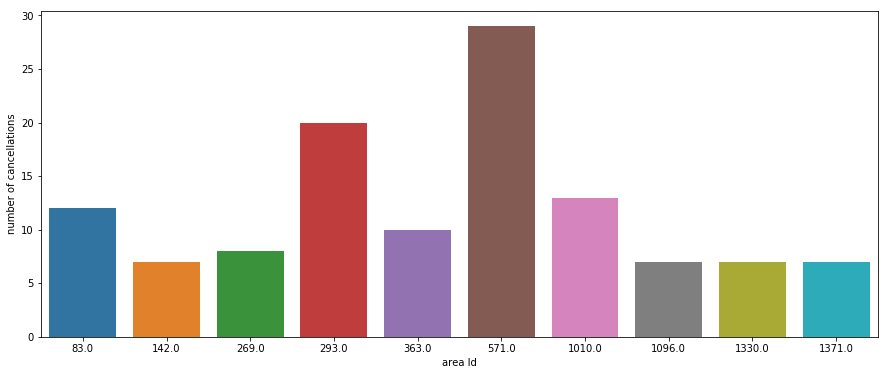

In [47]:
df_fri_cancellation_positive = df_fri[df_fri['Car_Cancellation'] == 1]

cancelled_freq = Counter(df_fri_cancellation_positive['from_area_id'])
cancelled_freq = sorted(cancelled_freq.items(), key=operator.itemgetter(1))

top_cancellation = cancelled_freq[-10:]

top_cancellation_id = []
top_cancellation_times = []
for i, j in top_cancellation:
    top_cancellation_id.append(i)
    top_cancellation_times.append(j)

fig, ax = pyplot.subplots(figsize=(15,6))
ax = sns.barplot(top_cancellation_id, top_cancellation_times, ax=ax)
ax.set(xlabel="area Id", ylabel="number of cancellations")

# Time Interval Analysis

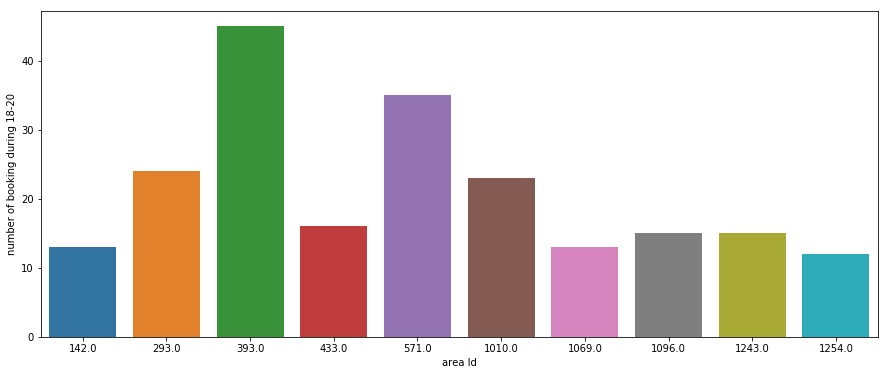

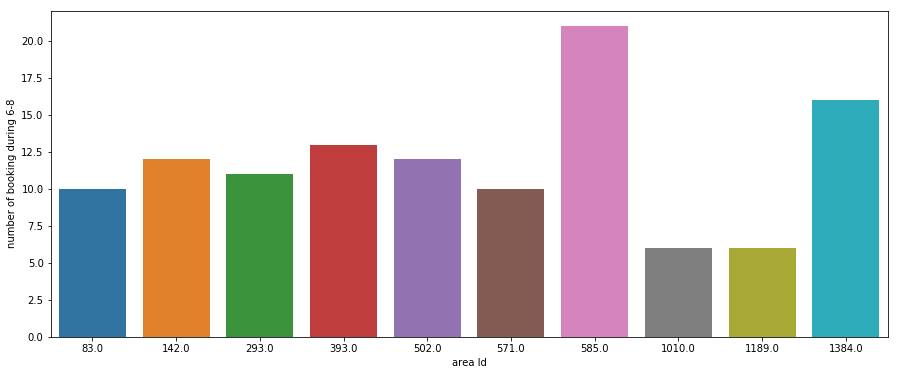

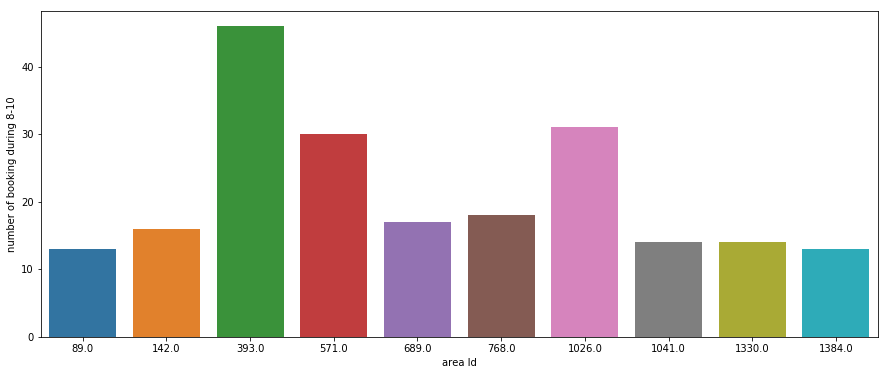

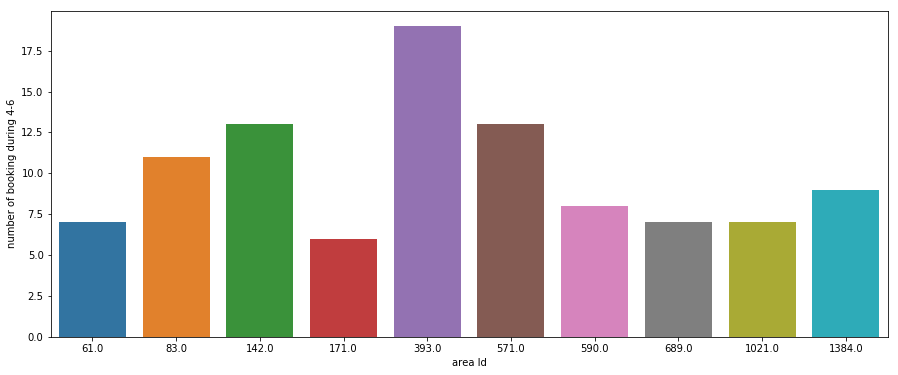

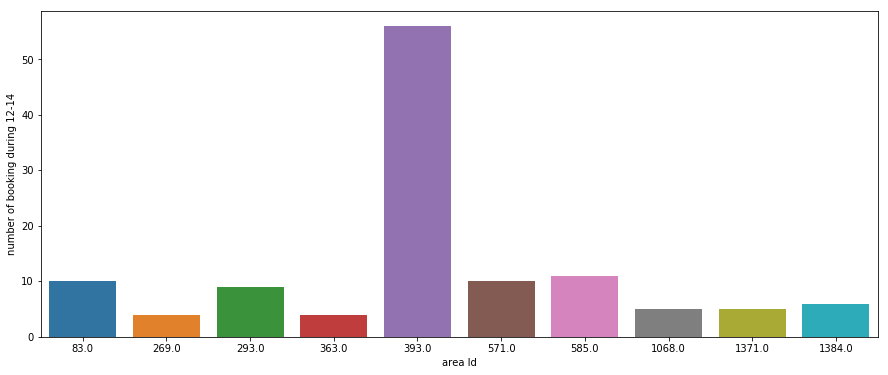

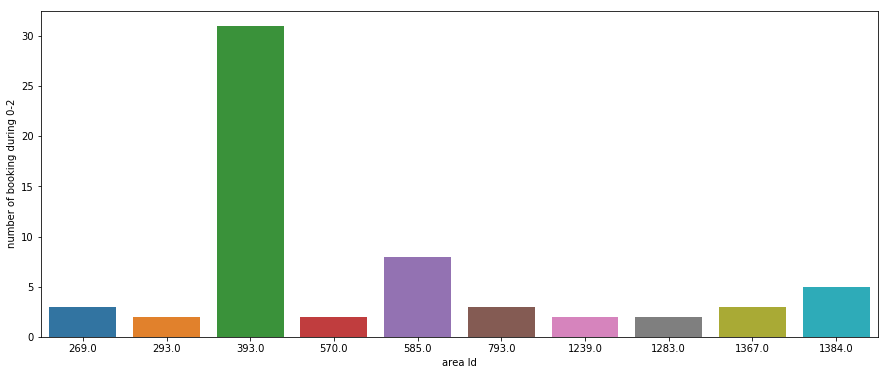

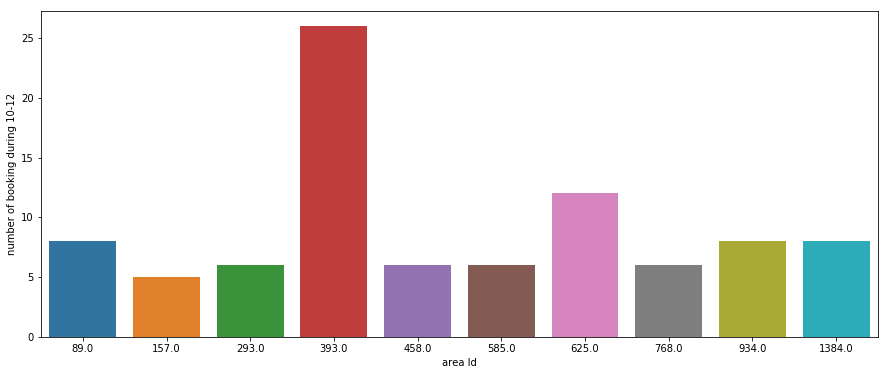

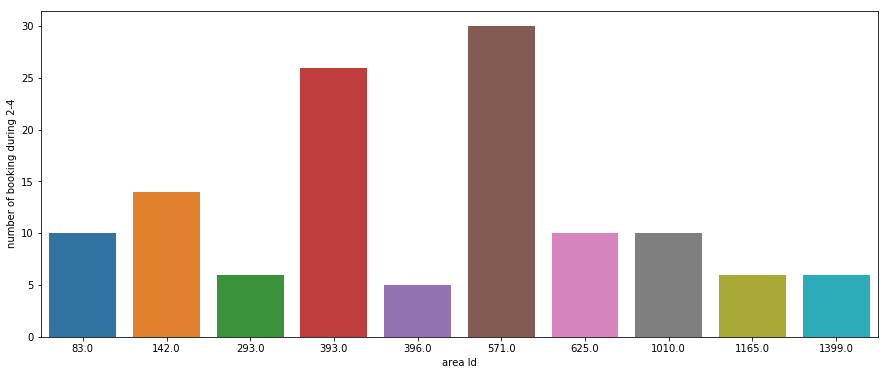

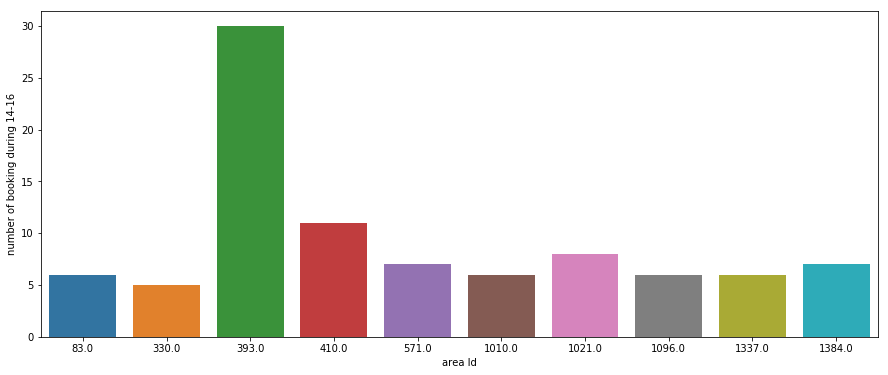

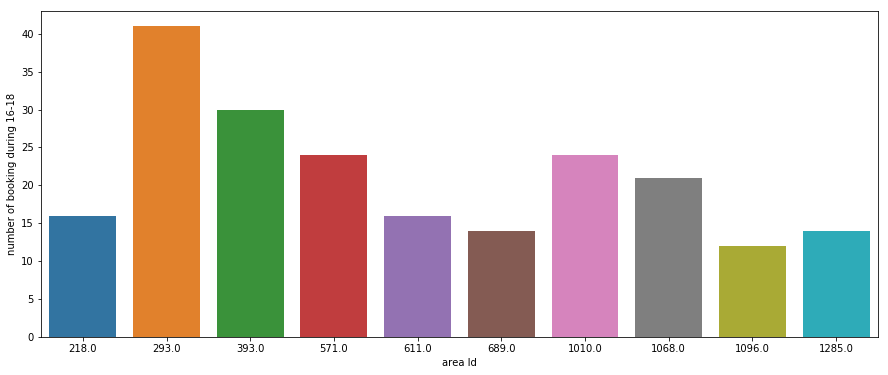

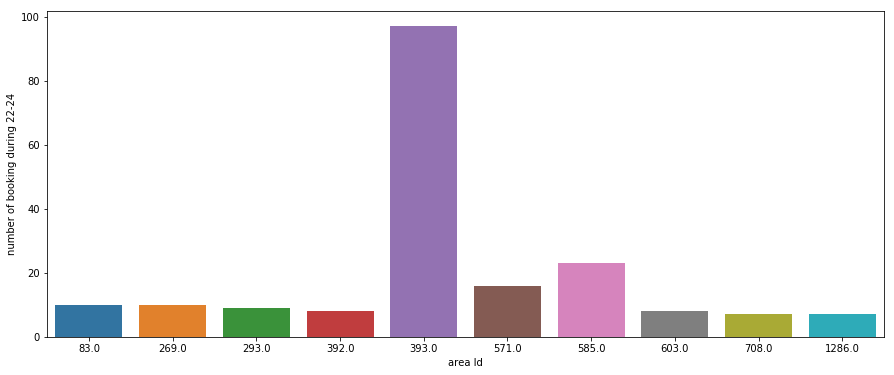

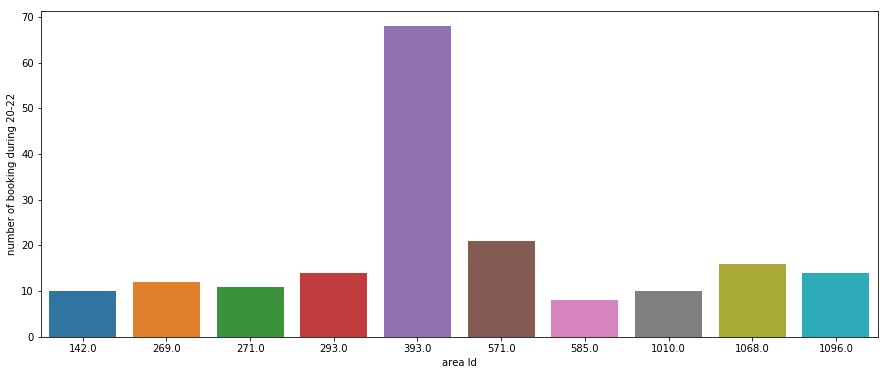

In [48]:
def timeIntervalPlotting(timeInterval):
    df_workUpon = df_fri[df_fri["time-interval"] == timeInterval]
    freq = Counter(df_workUpon["from_area_id"])
    freq = sorted(freq.items(), key=operator.itemgetter(1))
    top = freq[-10:]
    
    areaId = []
    booking_times = []
    for i, j in top:
        areaId.append(i)
        booking_times.append(j)
    
    fig, ax = pyplot.subplots(figsize=(15,6))
    ax = sns.barplot(areaId, booking_times, ax=ax)
    ax.set(xlabel="area Id", ylabel="number of booking during {}".format(timeInterval))

for i in df_fri["time-interval"].unique():
    timeIntervalPlotting(i)

# Saturday Analysis

Text(0, 0.5, 'no. of bookings')

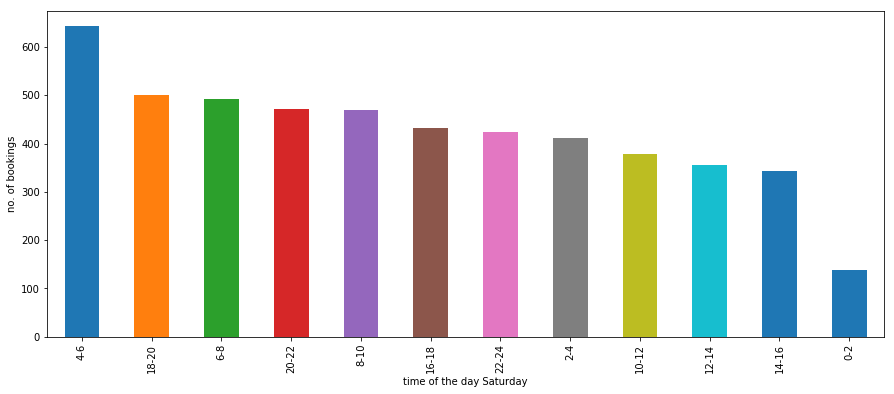

In [49]:
plot = df_sat['time-interval'].value_counts().plot.bar(figsize=(15,6))
plot.set_xlabel("time of the day Saturday")
plot.set_ylabel("no. of bookings")

[Text(0, 0.5, 'number of bookings'), Text(0.5, 0, 'from_Area Code')]

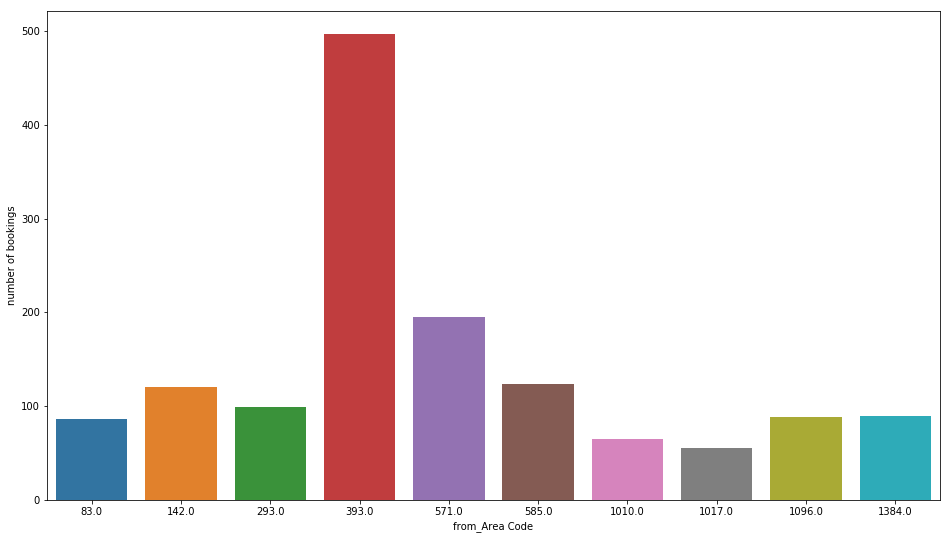

In [50]:
from_area_id_frequency = Counter(df_sat['from_area_id'])
from_area_id_sorted = sorted(from_area_id_frequency.items(), key=operator.itemgetter(1))

top_bookings = from_area_id_sorted[-10:]

area_code = []
area_freq = []

for i, j in top_bookings:
    area_code.append(i)
    area_freq.append(j)

from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize=(16,9))
ax = sns.barplot(area_code, area_freq, ax=ax)
ax.set(xlabel="from_Area Code", ylabel="number of bookings")

# 393 Analysis

In [51]:
area_393_df = df_sat[df_sat['from_area_id'] == 393]

# where do people go from 393 area

[Text(0, 0.5, 'number of bookings'), Text(0.5, 0, 'exact location')]

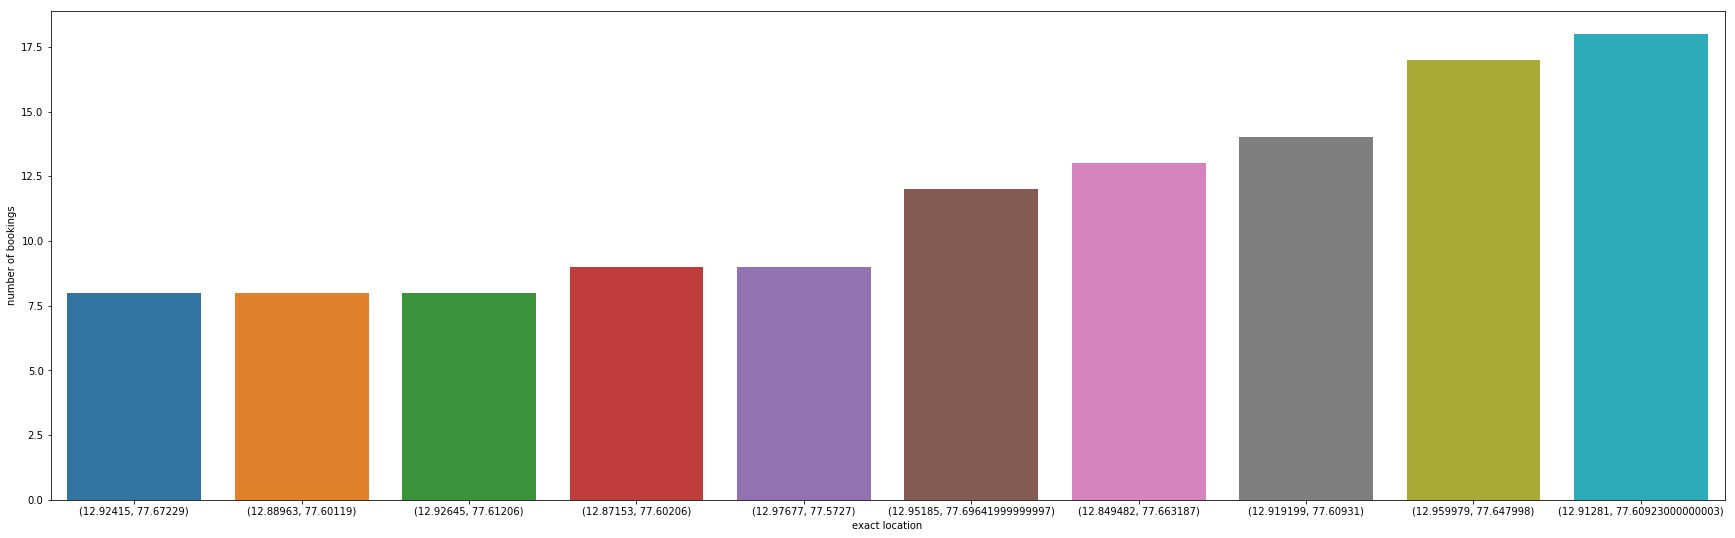

In [52]:
to_loc = list(zip(area_393_df['to_lat'], area_393_df['to_long']))
to_loc = Counter(to_loc)
to_loc = sorted(to_loc.items(), key=operator.itemgetter(1))

to_loc_top_10 = to_loc[-10:]

to_loc_top_10_exactLocation = []
to_loc_top_10_freq = []
for i, j in to_loc_top_10:
    to_loc_top_10_exactLocation.append(i)
    to_loc_top_10_freq.append(j)

to_loc_top_10_exactLocation = [str(i) for i in to_loc_top_10_exactLocation]

fig, ax = pyplot.subplots(figsize=(30,9))
ax = sns.barplot(to_loc_top_10_exactLocation, to_loc_top_10_freq, ax=ax)
ax.set(xlabel="exact location", ylabel="number of bookings")

# Cancellation

[Text(0, 0.5, 'number of cancellations'), Text(0.5, 0, 'area Id')]

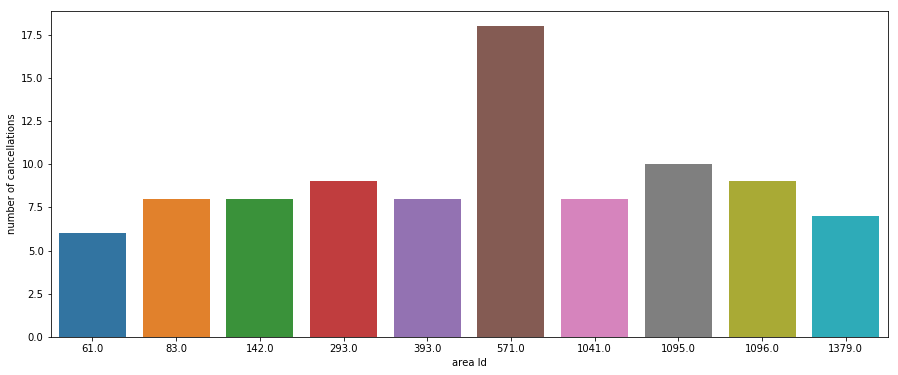

In [53]:
df_sat_cancellation_positive = df_sat[df_sat['Car_Cancellation'] == 1]

cancelled_freq = Counter(df_sat_cancellation_positive['from_area_id'])
cancelled_freq = sorted(cancelled_freq.items(), key=operator.itemgetter(1))

top_cancellation = cancelled_freq[-10:]

top_cancellation_id = []
top_cancellation_times = []
for i, j in top_cancellation:
    top_cancellation_id.append(i)
    top_cancellation_times.append(j)

fig, ax = pyplot.subplots(figsize=(15,6))
ax = sns.barplot(top_cancellation_id, top_cancellation_times, ax=ax)
ax.set(xlabel="area Id", ylabel="number of cancellations")

# Time Interval Analysis

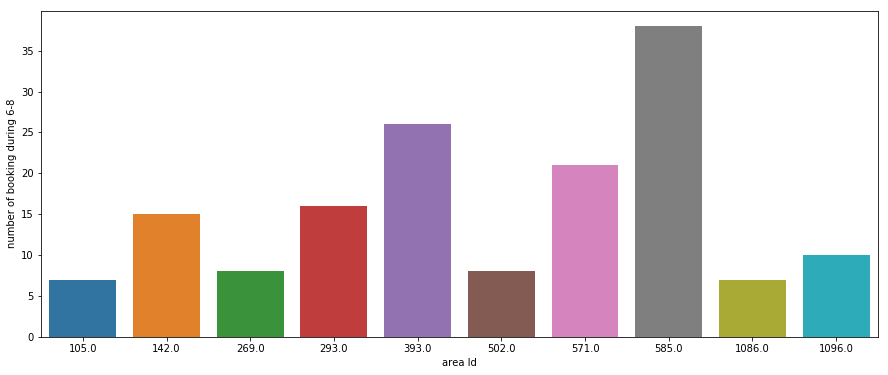

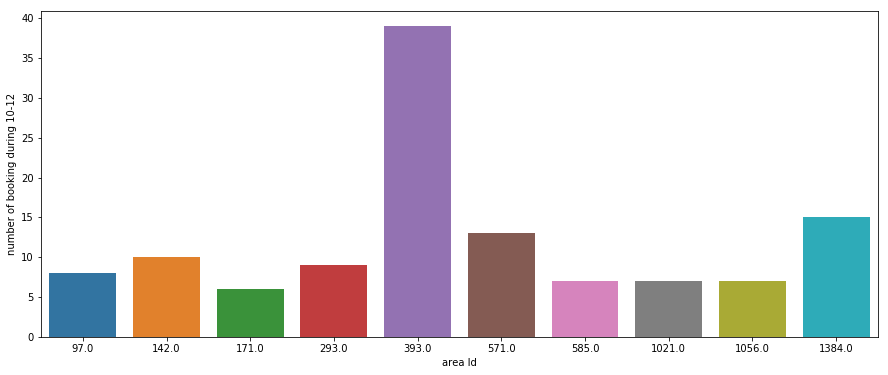

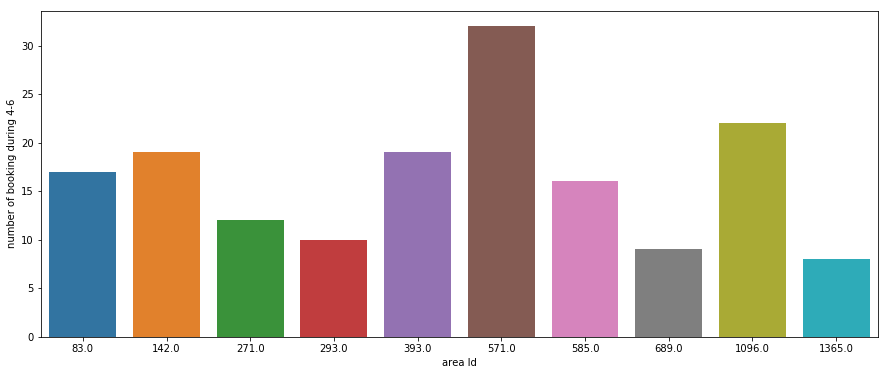

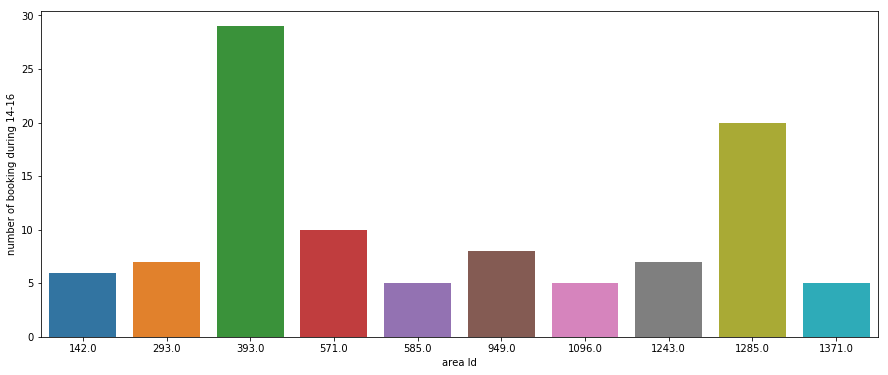

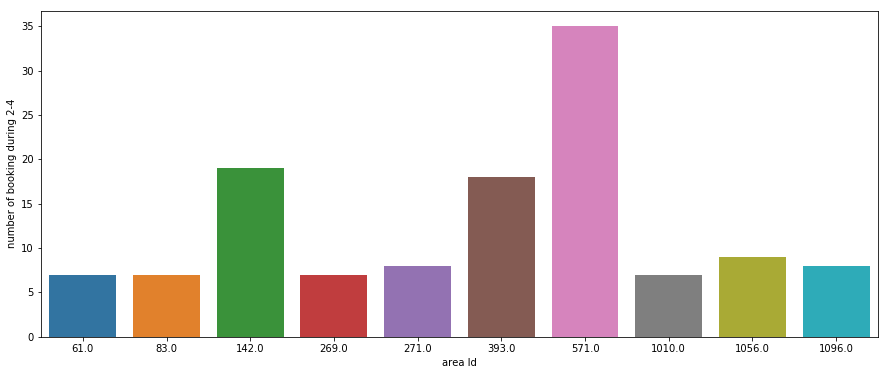

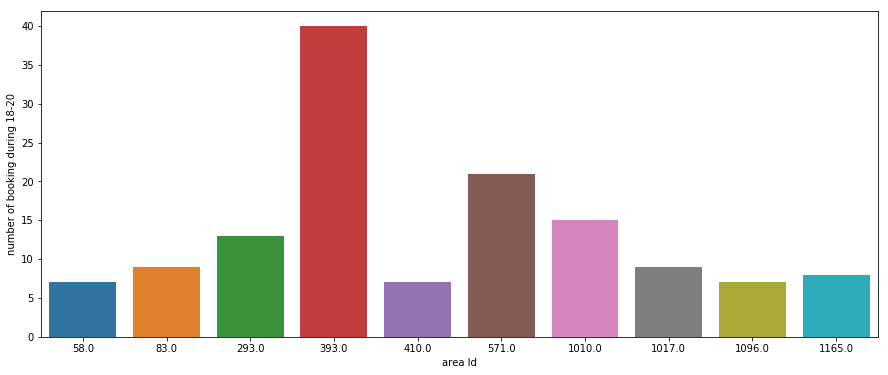

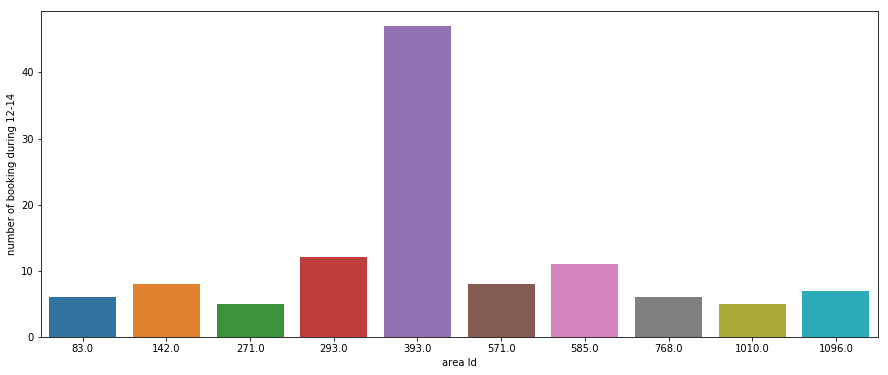

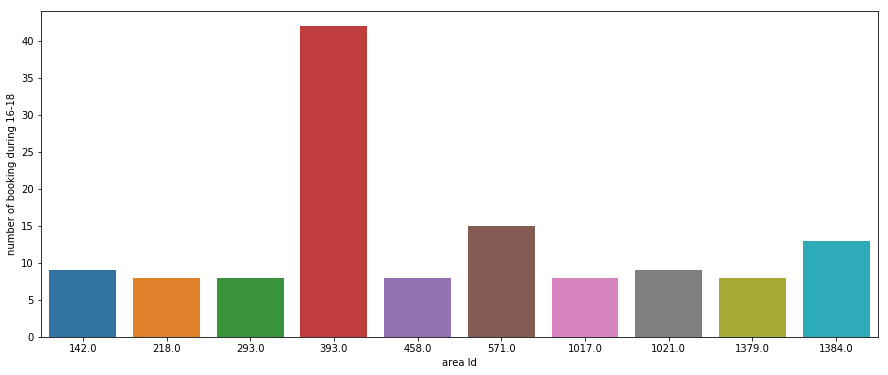

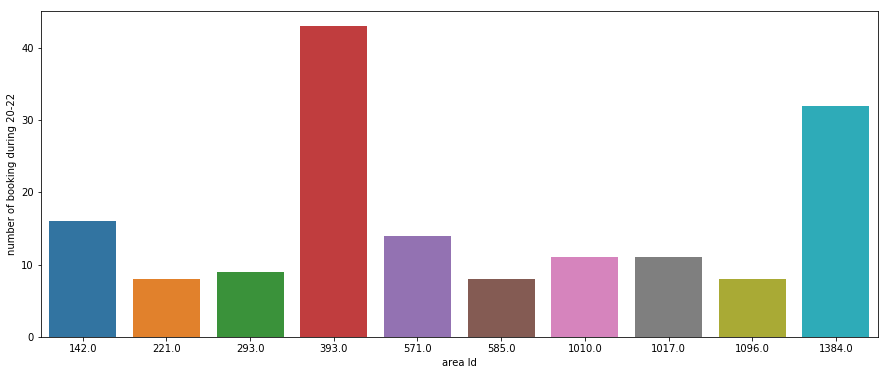

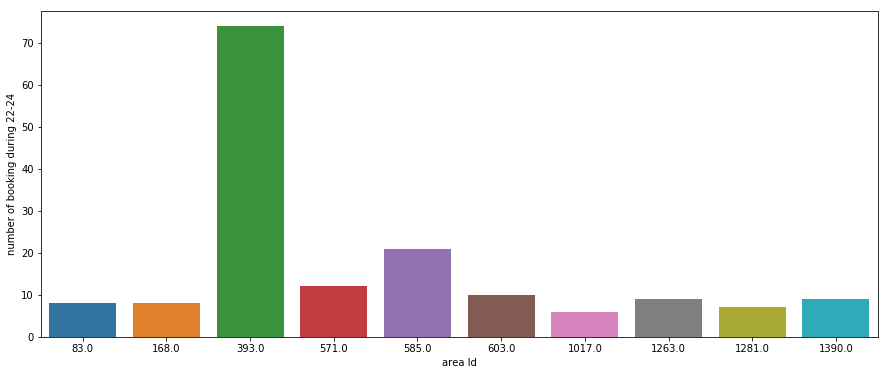

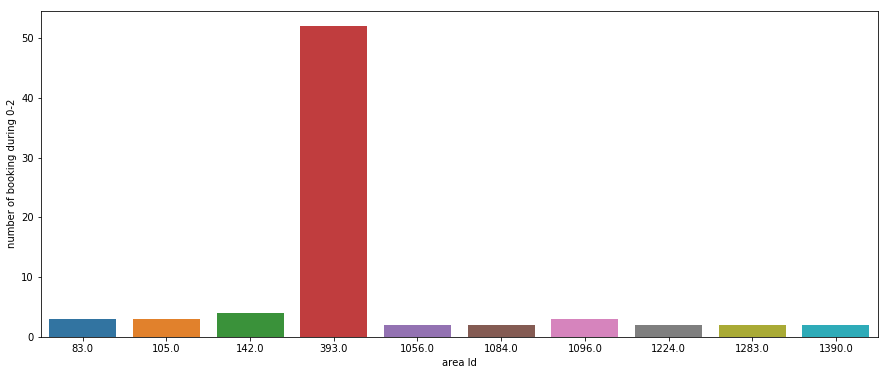

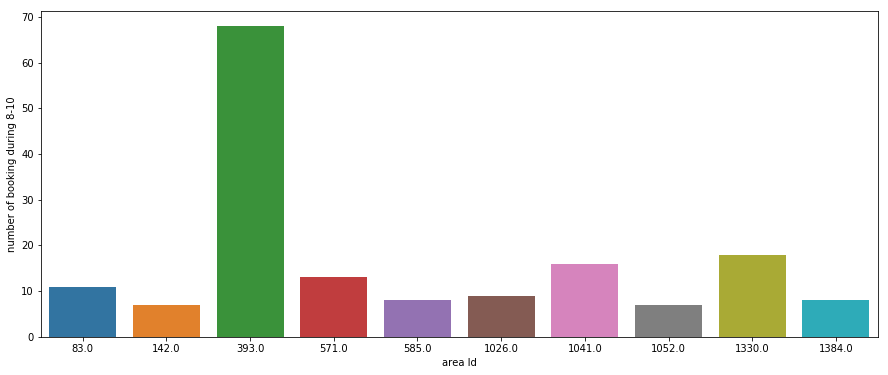

In [54]:
def timeIntervalPlotting(timeInterval):
    df_workUpon = df_sat[df_sat["time-interval"] == timeInterval]
    freq = Counter(df_workUpon["from_area_id"])
    freq = sorted(freq.items(), key=operator.itemgetter(1))
    top = freq[-10:]
    
    areaId = []
    booking_times = []
    for i, j in top:
        areaId.append(i)
        booking_times.append(j)
    
    fig, ax = pyplot.subplots(figsize=(15,6))
    ax = sns.barplot(areaId, booking_times, ax=ax)
    ax.set(xlabel="area Id", ylabel="number of booking during {}".format(timeInterval))

for i in df_sat["time-interval"].unique():
    timeIntervalPlotting(i)

# Sunday analysis

Text(0, 0.5, 'no. of bookings')

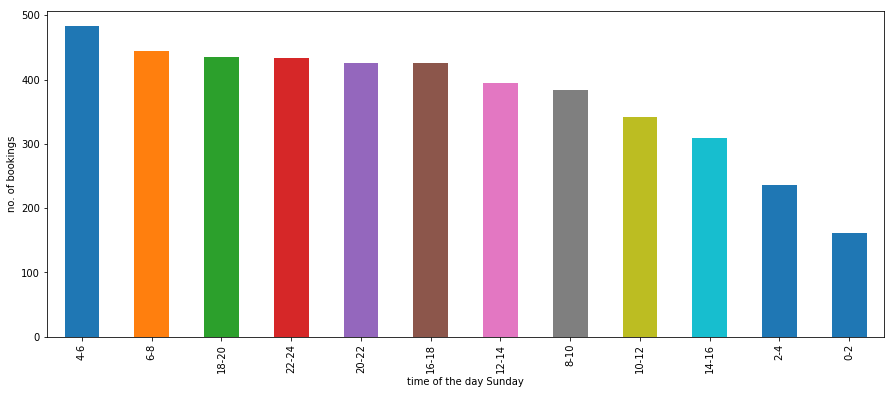

In [55]:
plot = df_sun['time-interval'].value_counts().plot.bar(figsize=(15,6))
plot.set_xlabel("time of the day Sunday")
plot.set_ylabel("no. of bookings")

[Text(0, 0.5, 'number of bookings'), Text(0.5, 0, 'from_Area Code')]

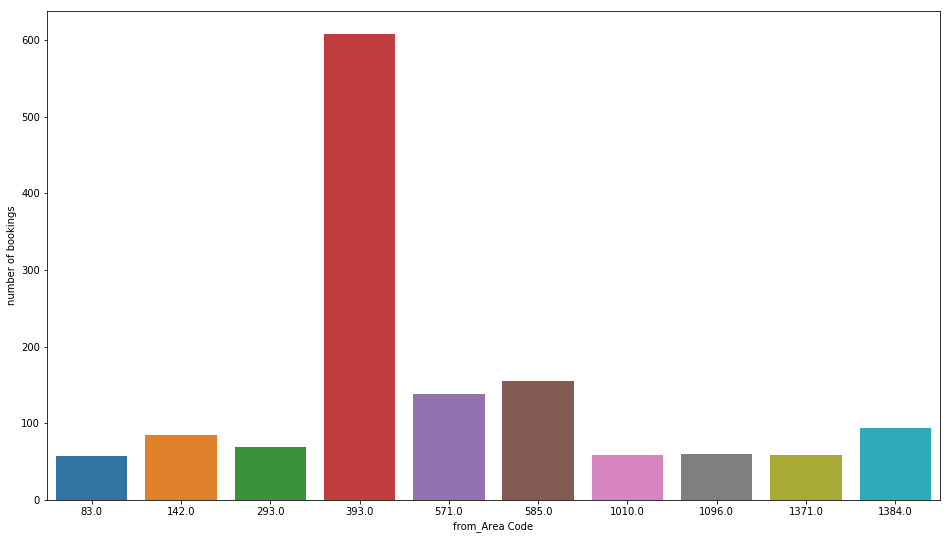

In [56]:
from_area_id_frequency = Counter(df_sun['from_area_id'])
from_area_id_sorted = sorted(from_area_id_frequency.items(), key=operator.itemgetter(1))

top_bookings = from_area_id_sorted[-10:]

area_code = []
area_freq = []

for i, j in top_bookings:
    area_code.append(i)
    area_freq.append(j)

from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize=(16,9))
ax = sns.barplot(area_code, area_freq, ax=ax)
ax.set(xlabel="from_Area Code", ylabel="number of bookings")

# 393 analysis

In [57]:
area_393_df = df_sun[df_sun['from_area_id'] == 393]

# where do people go from 393

[Text(0, 0.5, 'number of bookings'), Text(0.5, 0, 'exact location')]

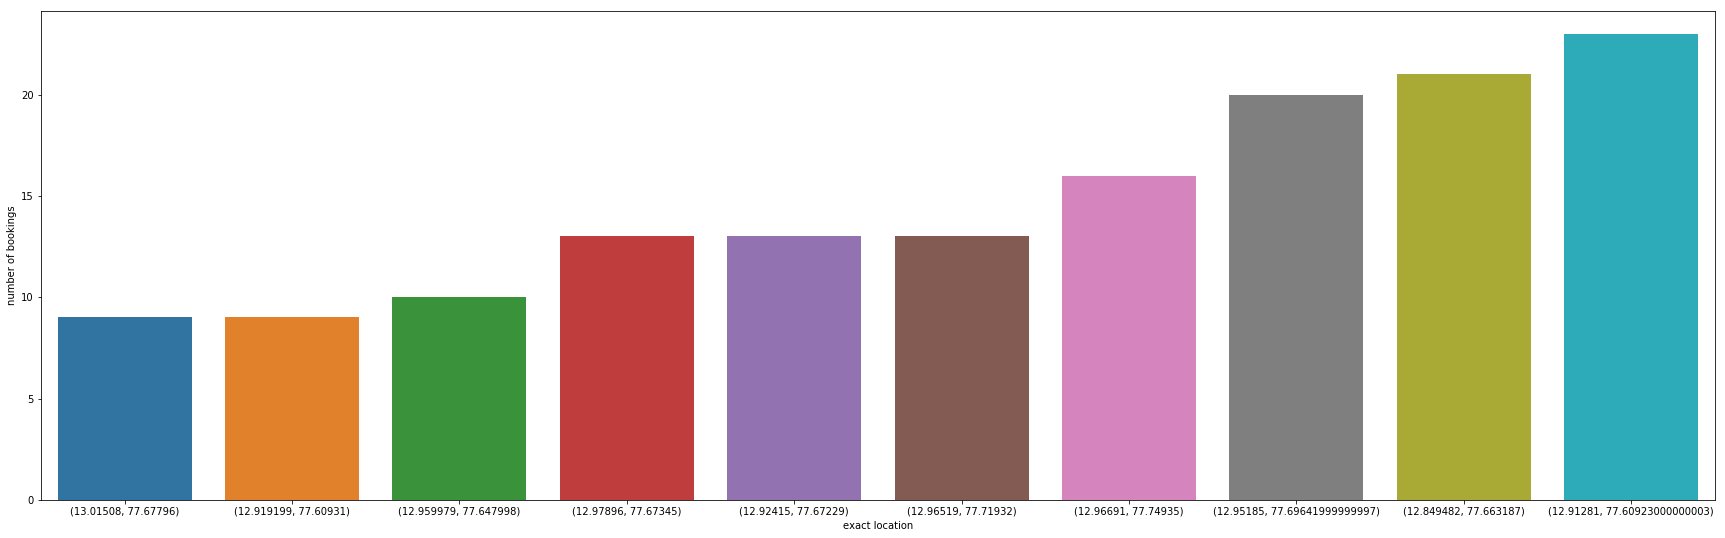

In [58]:
to_loc = list(zip(area_393_df['to_lat'], area_393_df['to_long']))
to_loc = Counter(to_loc)
to_loc = sorted(to_loc.items(), key=operator.itemgetter(1))

to_loc_top_10 = to_loc[-10:]

to_loc_top_10_exactLocation = []
to_loc_top_10_freq = []
for i, j in to_loc_top_10:
    to_loc_top_10_exactLocation.append(i)
    to_loc_top_10_freq.append(j)

to_loc_top_10_exactLocation = [str(i) for i in to_loc_top_10_exactLocation]

fig, ax = pyplot.subplots(figsize=(30,9))
ax = sns.barplot(to_loc_top_10_exactLocation, to_loc_top_10_freq, ax=ax)
ax.set(xlabel="exact location", ylabel="number of bookings")

# Cancellation

[Text(0, 0.5, 'number of cancellations'), Text(0.5, 0, 'area Id')]

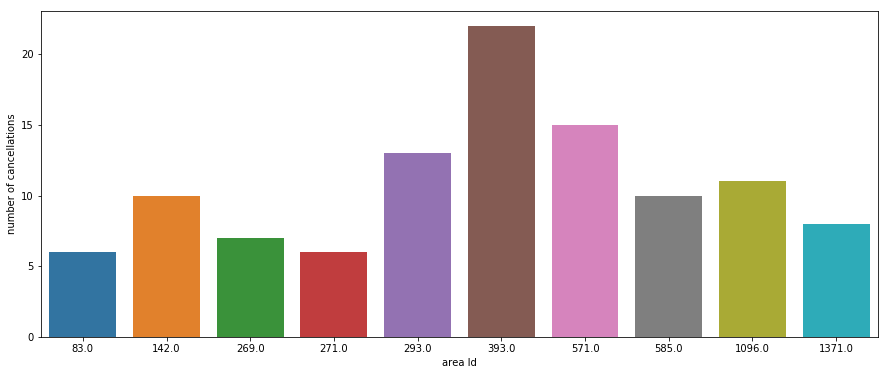

In [59]:
df_sun_cancellation_positive = df_sun[df_sun['Car_Cancellation'] == 1]

cancelled_freq = Counter(df_sun_cancellation_positive['from_area_id'])
cancelled_freq = sorted(cancelled_freq.items(), key=operator.itemgetter(1))

top_cancellation = cancelled_freq[-10:]

top_cancellation_id = []
top_cancellation_times = []
for i, j in top_cancellation:
    top_cancellation_id.append(i)
    top_cancellation_times.append(j)

fig, ax = pyplot.subplots(figsize=(15,6))
ax = sns.barplot(top_cancellation_id, top_cancellation_times, ax=ax)
ax.set(xlabel="area Id", ylabel="number of cancellations")

# Time Interval Analysis

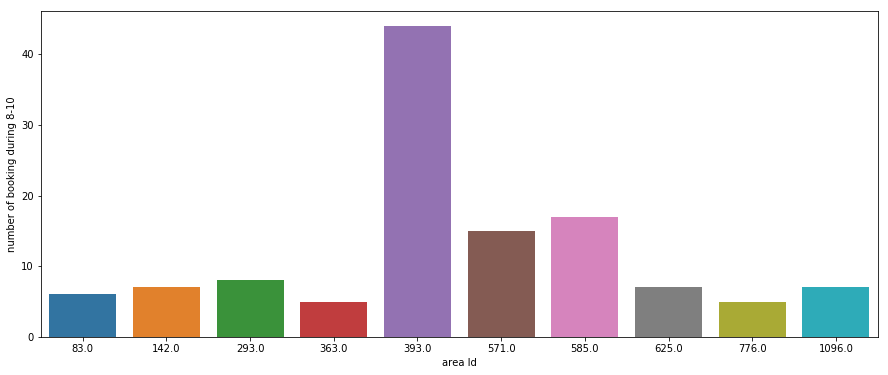

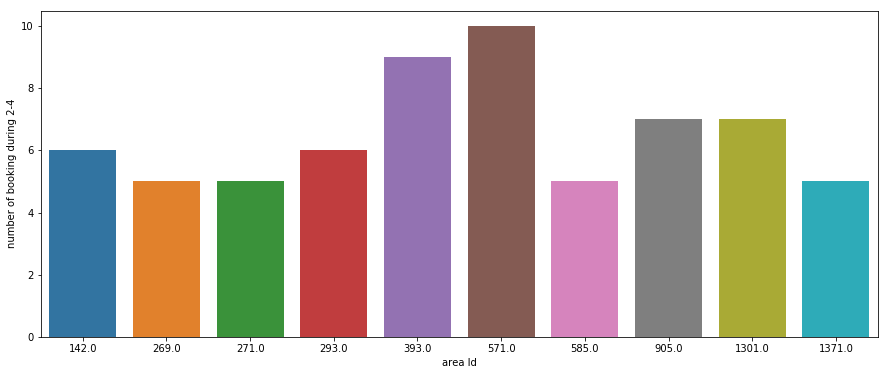

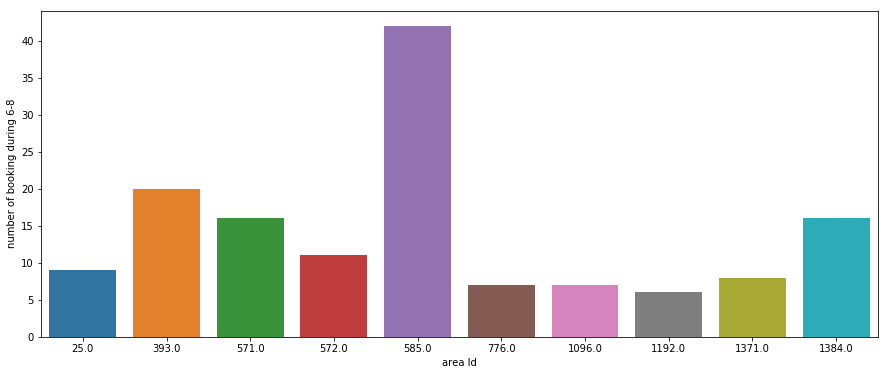

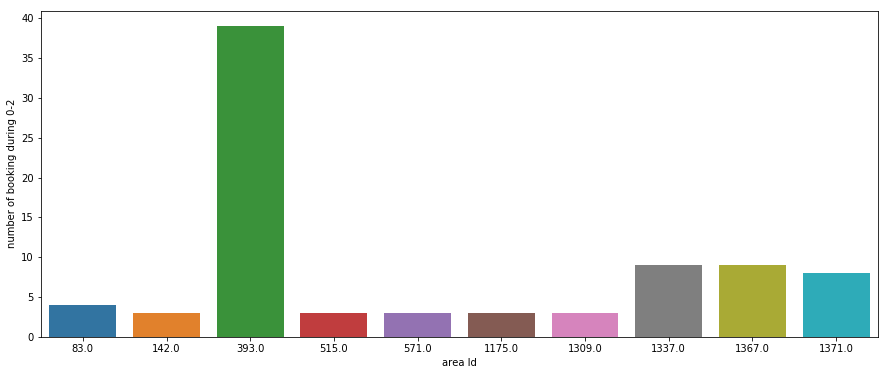

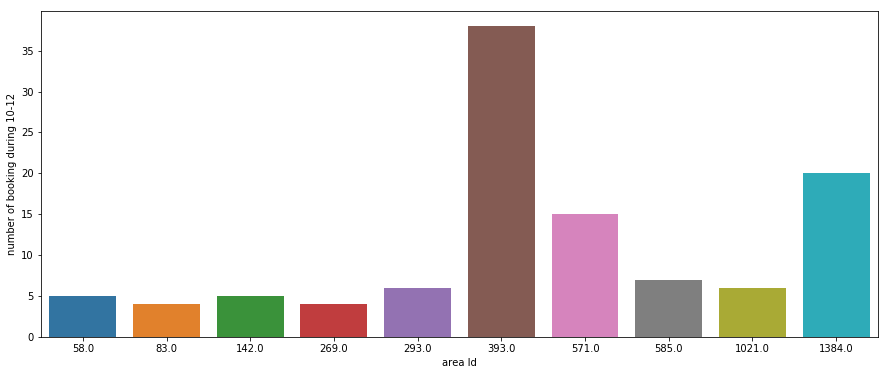

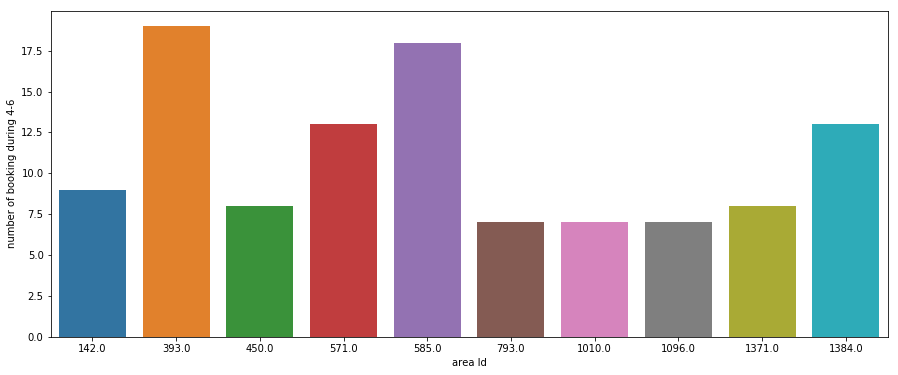

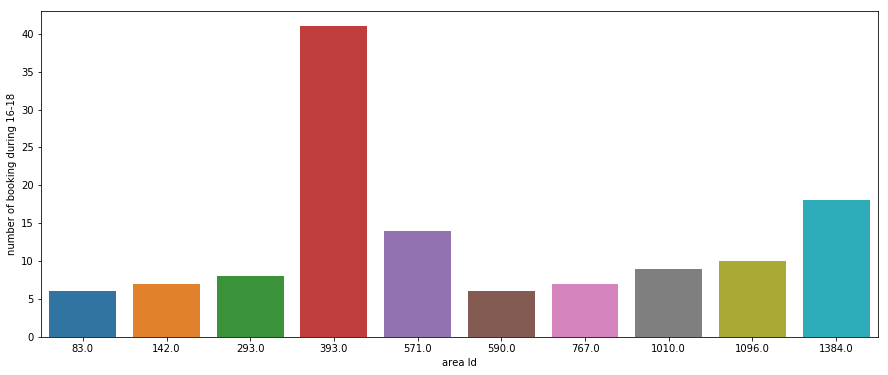

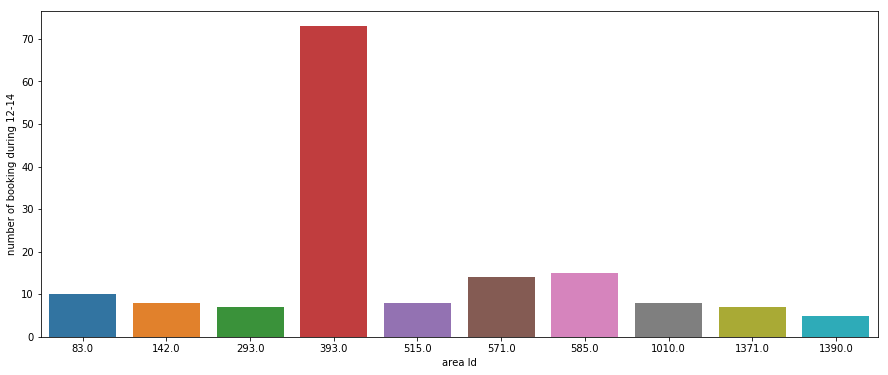

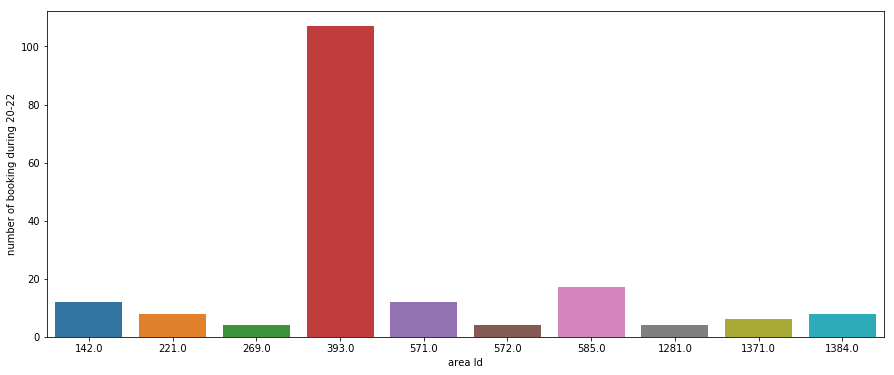

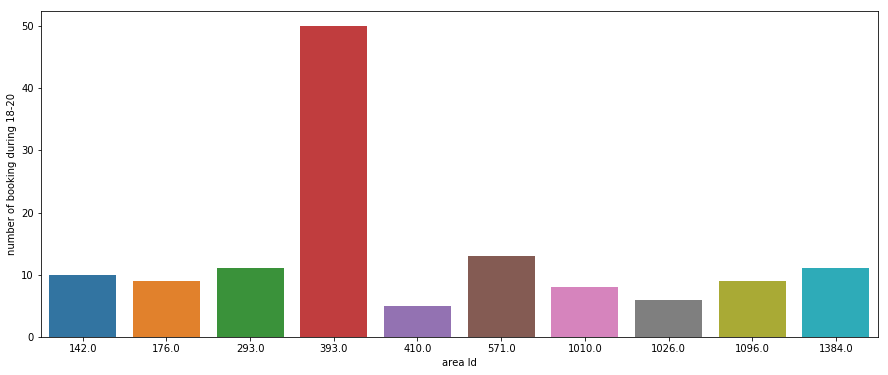

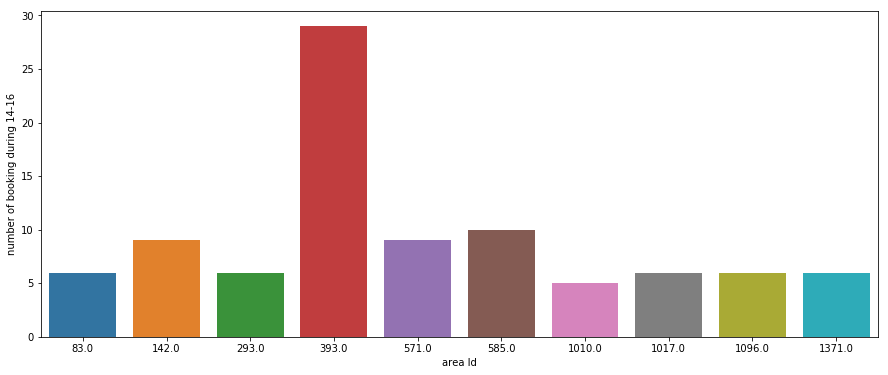

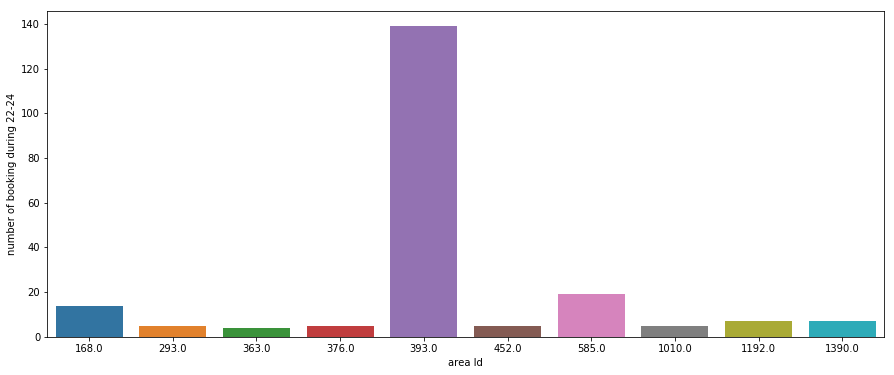

In [60]:
def timeIntervalPlotting(timeInterval):
    df_workUpon = df_sun[df_sun["time-interval"] == timeInterval]
    freq = Counter(df_workUpon["from_area_id"])
    freq = sorted(freq.items(), key=operator.itemgetter(1))
    top = freq[-10:]
    
    areaId = []
    booking_times = []
    for i, j in top:
        areaId.append(i)
        booking_times.append(j)
    
    fig, ax = pyplot.subplots(figsize=(15,6))
    ax = sns.barplot(areaId, booking_times, ax=ax)
    ax.set(xlabel="area Id", ylabel="number of booking during {}".format(timeInterval))

for i in df_sun["time-interval"].unique():
    timeIntervalPlotting(i)